# Introduction

- Predictive maintenance on NASA's turbofan engine degradation dataset (CMAPSS). 
- Datasets include simulations of multiple turbofan engines over time, each row contains the following information:
  1. Engine unit number
  2. Time, in cycles
  3. Three operational settings
  4. 21 sensor readings.




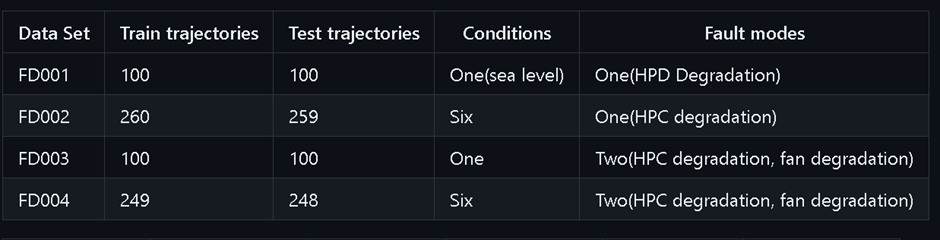

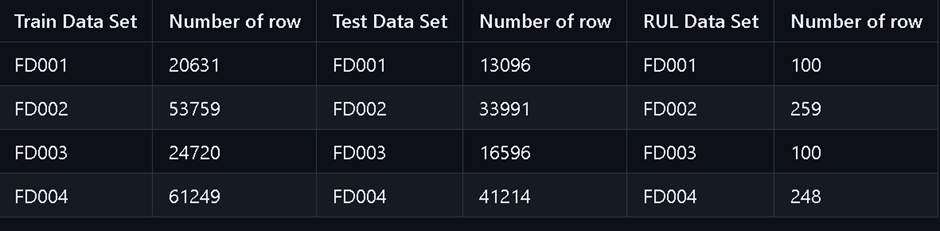

# Importing Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option("display.max_rows", None)


# Importing the Dataset

In [2]:

# define column names for easy indexing
index_names = ['unit_nr', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i) for i in range(1,22)]

col_names = index_names + setting_names + sensor_names

# read data
train = pd.read_csv('train_FD002.txt',sep='\s+', header=None, names=col_names)
test = pd.read_csv('test_FD002.txt',sep='\s+', header=None, names=col_names)
y_test = pd.read_csv('RUL_FD002.txt', sep='\s+', header=None, names=['RUL'])

# Train data contains all features (Unit Number + setting parameters & sensor parameters)
# Test data contains all features (Unit Number + setting parameters & sensor parameters)
# Y_test contains RUL for the test data.
train.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    34.9983     0.8400      100.0  449.44  555.32   
1        1            2    41.9982     0.8408      100.0  445.00  549.90   
2        1            3    24.9988     0.6218       60.0  462.54  537.31   
3        1            4    42.0077     0.8416      100.0  445.00  549.51   
4        1            5    25.0005     0.6203       60.0  462.54  537.07   

       s_3      s_4   s_5  ...    s_12     s_13     s_14     s_15  s_16  s_17  \
0  1358.61  1137.23  5.48  ...  183.06  2387.72  8048.56   9.3461  0.02   334   
1  1353.22  1125.78  3.91  ...  130.42  2387.66  8072.30   9.3774  0.02   330   
2  1256.76  1047.45  7.05  ...  164.22  2028.03  7864.87  10.8941  0.02   309   
3  1354.03  1126.38  3.91  ...  130.72  2387.61  8068.66   9.3528  0.02   329   
4  1257.71  1047.93  7.05  ...  164.31  2028.00  7861.23  10.8963  0.02   309   

   s_18    s_19   s_20    s_21  
0  2223  100.00  14.73  8.8071  
1  2212  100.00  10.41  6.2665  
2  1915   84.93  14.08  8.6723  
3  2212  100.00  10.59  6.4701  
4  1915   84.93  14.13  8.5286  

[5 rows x 26 columns]

In [3]:
test.head()

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1     9.9987     0.2502      100.0  489.05  605.03   
1        1            2    20.0026     0.7000      100.0  491.19  607.82   
2        1            3    35.0045     0.8400      100.0  449.44  556.00   
3        1            4    42.0066     0.8410      100.0  445.00  550.17   
4        1            5    24.9985     0.6213       60.0  462.54  536.72   

       s_3      s_4    s_5  ...    s_12     s_13     s_14     s_15  s_16  \
0  1497.17  1304.99  10.52  ...  371.69  2388.18  8114.10   8.6476  0.03   
1  1481.20  1246.11   9.35  ...  315.32  2388.12  8053.06   9.2405  0.02   
2  1359.08  1128.36   5.48  ...  183.04  2387.75  8053.04   9.3472  0.02   
3  1349.69  1127.89   3.91  ...  130.40  2387.72  8066.90   9.3961  0.02   
4  1253.18  1050.69   7.05  ...  164.56  2028.05  7865.66  10.8682  0.02   

   s_17  s_18    s_19   s_20     s_21  
0   369  2319  100.00  28.42  17.1551  
1   364  2324  100.00  24.29  14.8039  
2   333  2223  100.00  14.98   8.9125  
3   332  2212  100.00  10.35   6.4181  
4   305  1915   84.93  14.31   8.5740  

[5 rows x 26 columns]

In [4]:
y_test.head()

RUL
0   18
1   79
2  106
3  110
4   15

In [5]:
train.shape

(53759, 26)

In [6]:
y_test.shape

(259, 1)

In [7]:
train['unit_nr'].unique()

# There are 259 no unique engines.

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

Note:  for Test Dataset Since the true RUL values for the test set are only provided for the last time cycle of each enginge, 
therefore the test dataset will be subsetted to represent the same.

In [8]:
test.shape

(33991, 26)

In [9]:
# Since the true RUL values (y_test) for the test set are only provided for the last time cycle of each enginge, 
# the test set is subsetted to represent the same

test = test.groupby('unit_nr').last().reset_index().drop(['unit_nr','time_cycles'], axis=1)


In [10]:
y_test.shape

# RUL value for 259 no of engines.

(259, 1)

In [11]:
test.shape
# Now test data contains entries for 259 no of engines with their RUL.

(259, 24)

# Data Pre-Processing + Data Visualization

In [12]:
train.describe()

unit_nr   time_cycles     setting_1     setting_2     setting_3  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     131.082981    109.154746     23.998407      0.572056     94.046020   
std       74.463862     69.180569     14.747376      0.310016     14.237735   
min        1.000000      1.000000      0.000000      0.000000     60.000000   
25%       68.000000     52.000000     10.004600      0.250700    100.000000   
50%      131.000000    104.000000     25.001300      0.700000    100.000000   
75%      195.000000    157.000000     41.998000      0.840000    100.000000   
max      260.000000    378.000000     42.008000      0.842000    100.000000   

                s_1           s_2           s_3           s_4           s_5  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean     472.910207    579.672399   1419.971013   1205.442024      8.031986   
std       26.389707     37.289399    105.946341    119.123428      3.613839   
min      445.000000    535.530000   1243.730000   1023.770000      3.910000   
25%      445.000000    549.570000   1352.760000   1123.655000      3.910000   
50%      462.540000    555.980000   1369.180000   1138.890000      7.050000   
75%      491.190000    607.340000   1499.370000   1306.850000     10.520000   
max      518.670000    644.520000   1612.880000   1439.230000     14.620000   

       ...          s_12          s_13          s_14          s_15  \
count  ...  53759.000000  53759.000000  53759.000000  53759.000000   
mean   ...    266.069034   2334.557253   8066.597682      9.329654   
std    ...    137.659507    128.068271     84.837950      0.749335   
min    ...    129.120000   2027.610000   7848.360000      8.335700   
25%    ...    131.520000   2387.900000   8062.140000      8.677800   
50%    ...    183.200000   2388.080000   8082.540000      9.310900   
75%    ...    371.260000   2388.170000   8127.195000      9.386900   
max    ...    523.370000   2390.480000   8268.500000     11.066900   

               s_16          s_17          s_18          s_19          s_20  \
count  53759.000000  53759.000000  53759.000000  53759.000000  53759.000000   
mean       0.023326    348.309511   2228.806358     97.756838     20.789296   
std        0.004711     27.754515    145.327980      5.364067      9.869331   
min        0.020000    303.000000   1915.000000     84.930000     10.180000   
25%        0.020000    331.000000   2212.000000    100.000000     10.910000   
50%        0.020000    335.000000   2223.000000    100.000000     14.880000   
75%        0.030000    369.000000   2324.000000    100.000000     28.470000   
max        0.030000    399.000000   2388.000000    100.000000     39.340000   

               s_21  
count  53759.000000  
mean      12.473423  
std        5.921615  
min        6.010500  
25%        6.546300  
50%        8.929200  
75%       17.083200  
max       23.590100  

[8 rows x 26 columns]

In [13]:
# Adding RUL (Ramining Useful Life) to the train dataset

In [14]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="unit_nr")
    max_cycle = grouped_by_unit["time_cycles"].max()
    
    # Merge the max cycle back into the original frame
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='unit_nr', right_index=True)
    
    # Calculate remaining useful life for each row
    remaining_useful_life = result_frame["max_cycle"] - result_frame["time_cycles"]
    result_frame["RUL"] = remaining_useful_life
    
    # drop max_cycle as it's no longer needed
    result_frame = result_frame.drop("max_cycle", axis=1)
    return result_frame

train = add_remaining_useful_life(train)
train[sensor_names+['RUL']].head()

s_1     s_2      s_3      s_4   s_5   s_6     s_7      s_8      s_9  \
0  449.44  555.32  1358.61  1137.23  5.48  8.00  194.64  2222.65  8341.91   
1  445.00  549.90  1353.22  1125.78  3.91  5.71  138.51  2211.57  8303.96   
2  462.54  537.31  1256.76  1047.45  7.05  9.02  175.71  1915.11  8001.42   
3  445.00  549.51  1354.03  1126.38  3.91  5.71  138.46  2211.58  8303.96   
4  462.54  537.07  1257.71  1047.93  7.05  9.03  175.05  1915.10  7993.23   

   s_10  ...     s_13     s_14     s_15  s_16  s_17  s_18    s_19   s_20  \
0  1.02  ...  2387.72  8048.56   9.3461  0.02   334  2223  100.00  14.73   
1  1.02  ...  2387.66  8072.30   9.3774  0.02   330  2212  100.00  10.41   
2  0.94  ...  2028.03  7864.87  10.8941  0.02   309  1915   84.93  14.08   
3  1.02  ...  2387.61  8068.66   9.3528  0.02   329  2212  100.00  10.59   
4  0.94  ...  2028.00  7861.23  10.8963  0.02   309  1915   84.93  14.13   

     s_21  RUL  
0  8.8071  148  
1  6.2665  147  
2  8.6723  146  
3  6.4701  145  
4  8.5286  144  

[5 rows x 22 columns]

In [15]:
train.head(5)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    34.9983     0.8400      100.0  449.44  555.32   
1        1            2    41.9982     0.8408      100.0  445.00  549.90   
2        1            3    24.9988     0.6218       60.0  462.54  537.31   
3        1            4    42.0077     0.8416      100.0  445.00  549.51   
4        1            5    25.0005     0.6203       60.0  462.54  537.07   

       s_3      s_4   s_5  ...     s_13     s_14     s_15  s_16  s_17  s_18  \
0  1358.61  1137.23  5.48  ...  2387.72  8048.56   9.3461  0.02   334  2223   
1  1353.22  1125.78  3.91  ...  2387.66  8072.30   9.3774  0.02   330  2212   
2  1256.76  1047.45  7.05  ...  2028.03  7864.87  10.8941  0.02   309  1915   
3  1354.03  1126.38  3.91  ...  2387.61  8068.66   9.3528  0.02   329  2212   
4  1257.71  1047.93  7.05  ...  2028.00  7861.23  10.8963  0.02   309  1915   

     s_19   s_20    s_21  RUL  
0  100.00  14.73  8.8071  148  
1  100.00  10.41  6.2665  147  
2   84.93  14.08  8.6723  146  
3  100.00  10.59  6.4701  145  
4   84.93  14.13  8.5286  144  

[5 rows x 27 columns]

## Plotting of RUL

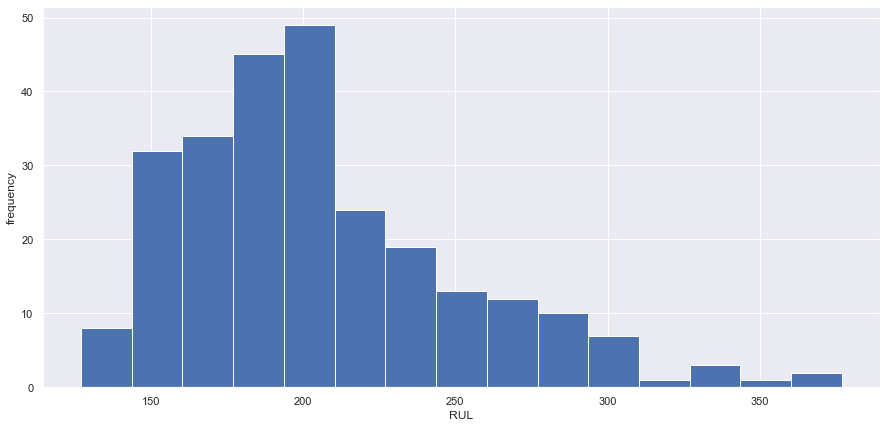

In [16]:
# distribution of RUL, similar to the 'describe function' of time_cycles above, but visual
df_max_rul = train[['unit_nr', 'RUL']].groupby('unit_nr').max().reset_index()
df_max_rul['RUL'].hist(bins=15, figsize=(15,7))
plt.xlabel('RUL')
plt.ylabel('frequency')
plt.show()

In [17]:
# We can see the RUL for engine is bit skewed on left side. This may affect perfomance of the model however as of now we will keep it as it.


## Plotting of Sensor Values Vs RUL

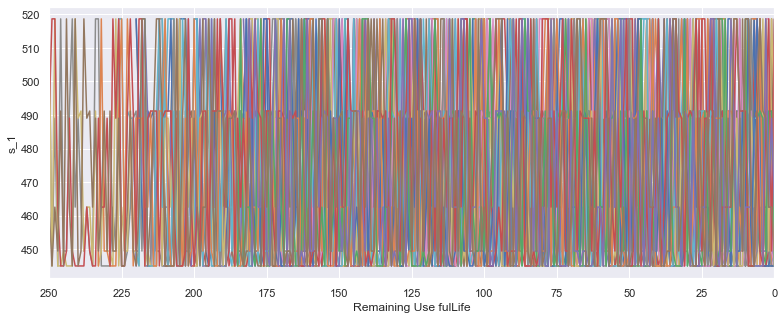

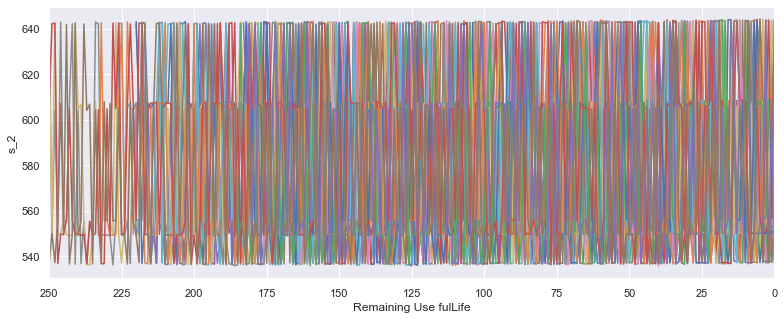

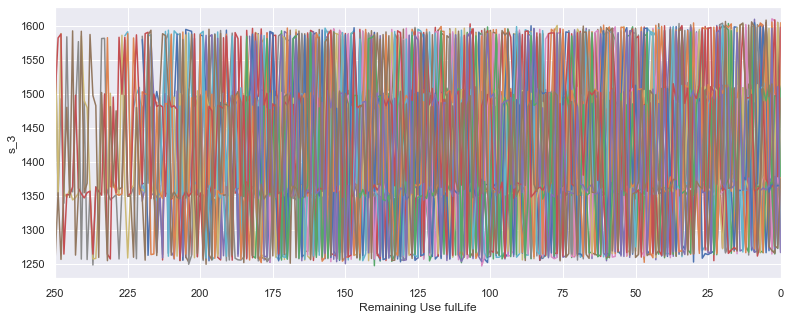

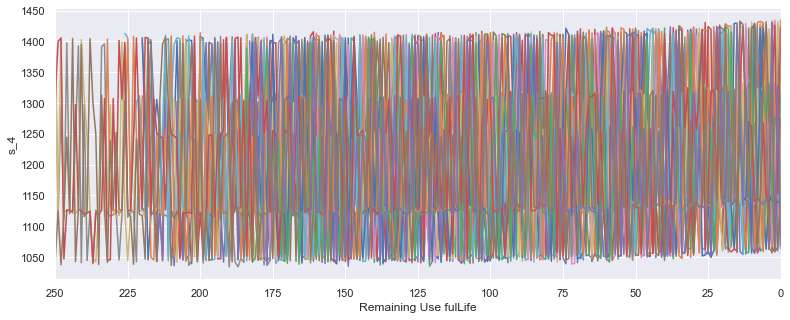

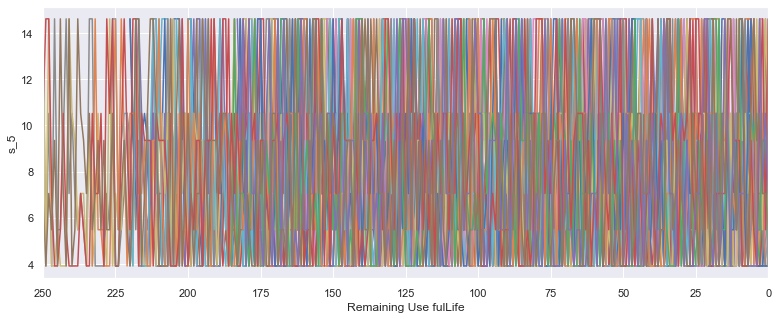

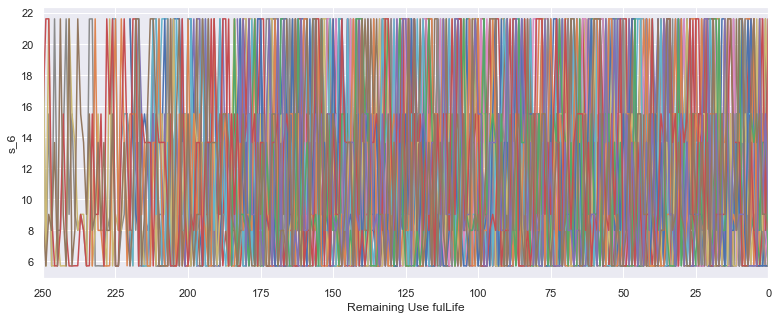

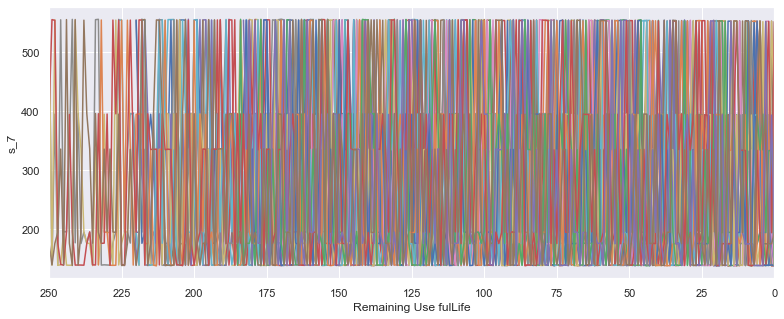

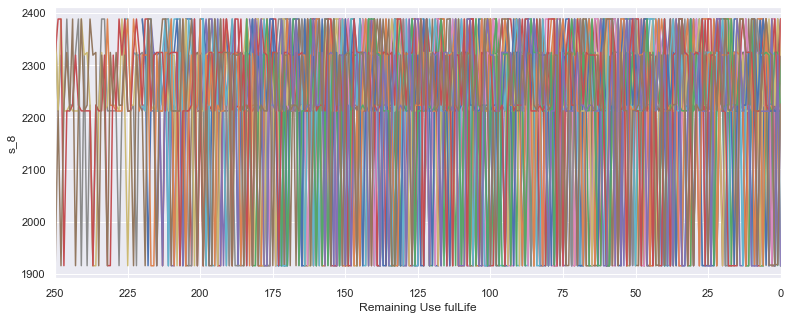

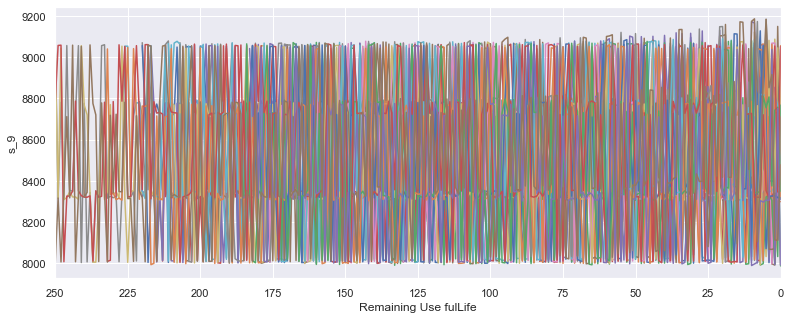

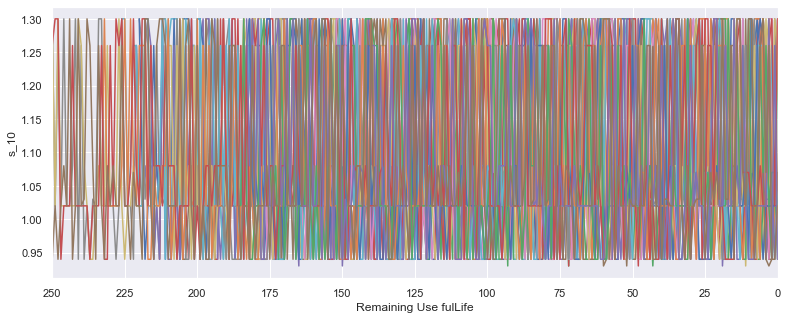

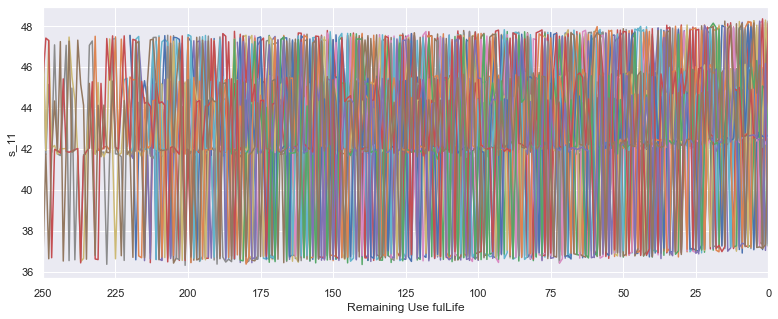

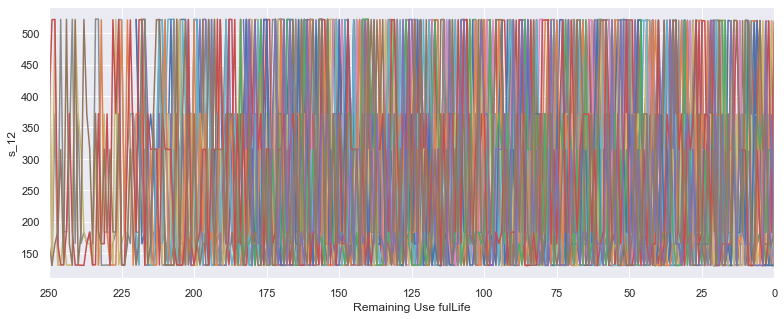

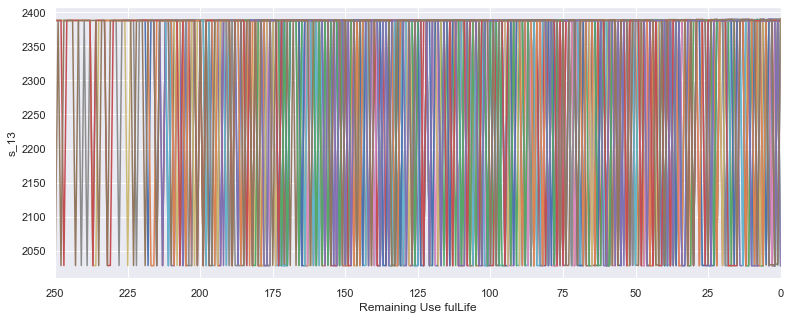

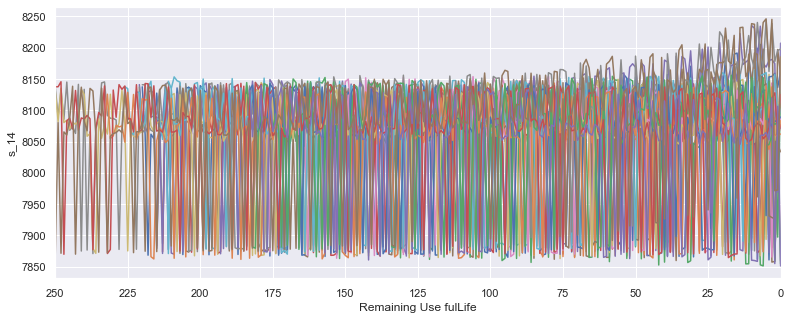

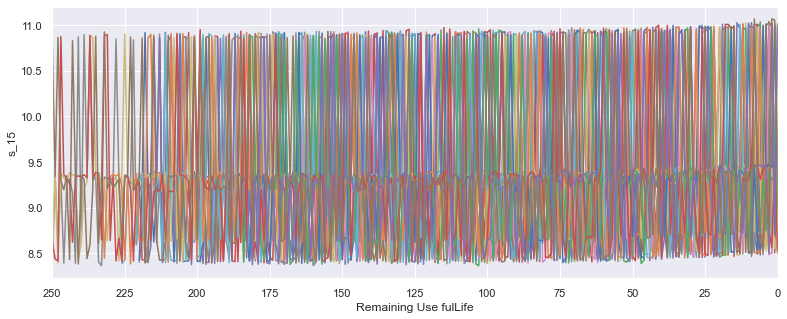

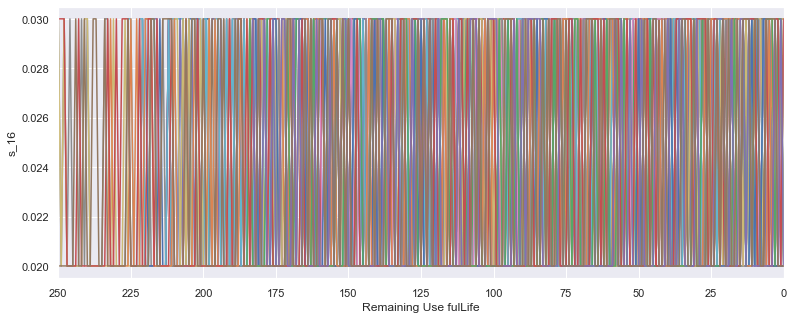

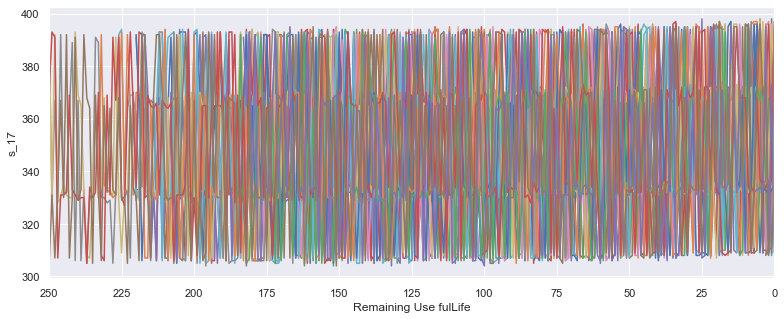

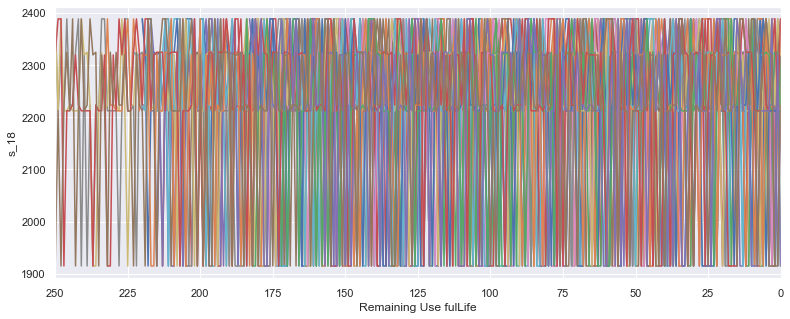

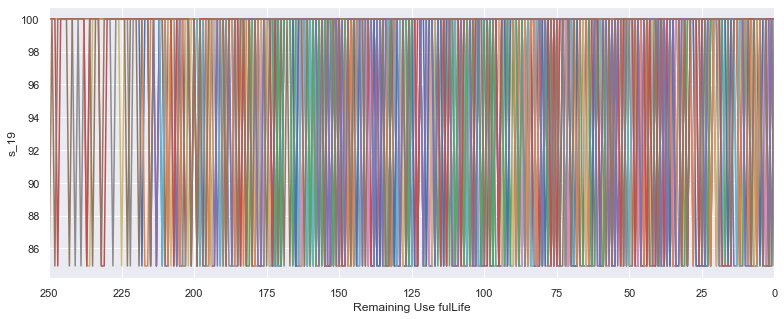

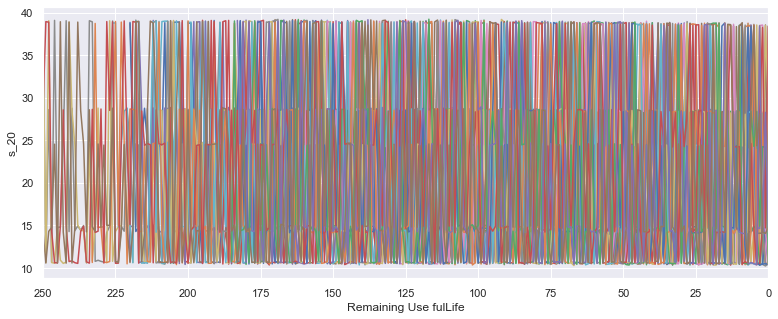

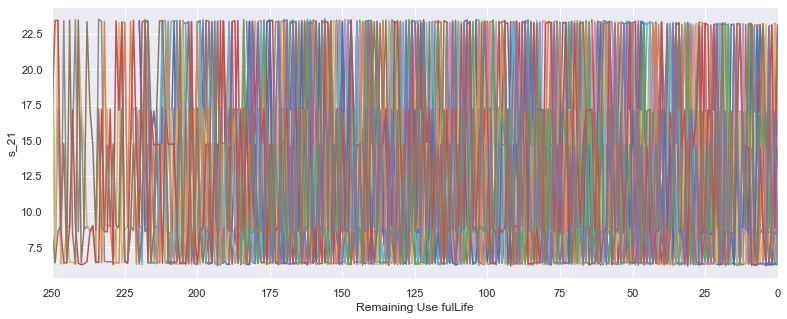

In [18]:
def plot_sensor(sensor_name):
    plt.figure(figsize=(13,5))
    for i in train['unit_nr'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train[train['unit_nr']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

for sensor_name in sensor_names:
    plot_sensor(sensor_name)

- Based on the plots you can see all sensors hold information related to Remaining Useful Life.
- As on now we will keep all features and will remove non-important features after calculating correlation value of each sensor variable with the RUL.

## Boxplots to find outliers

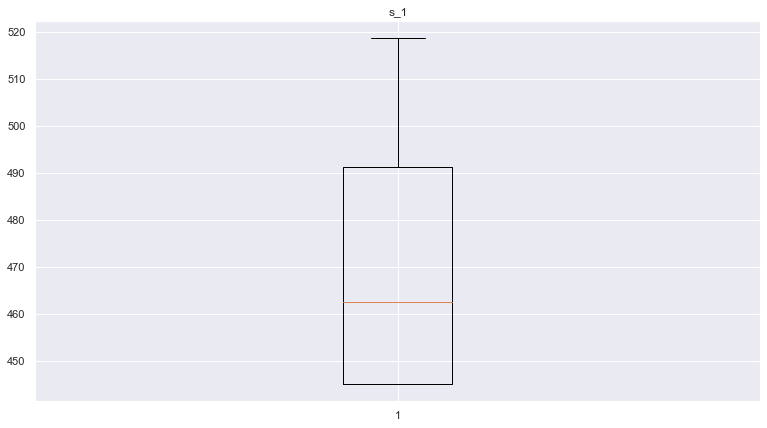

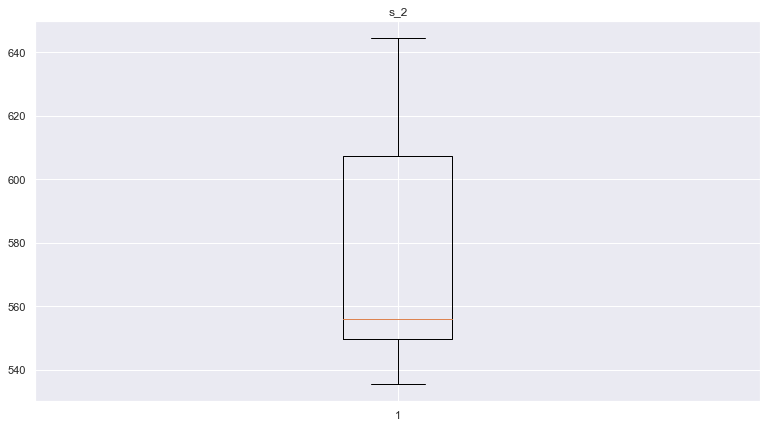

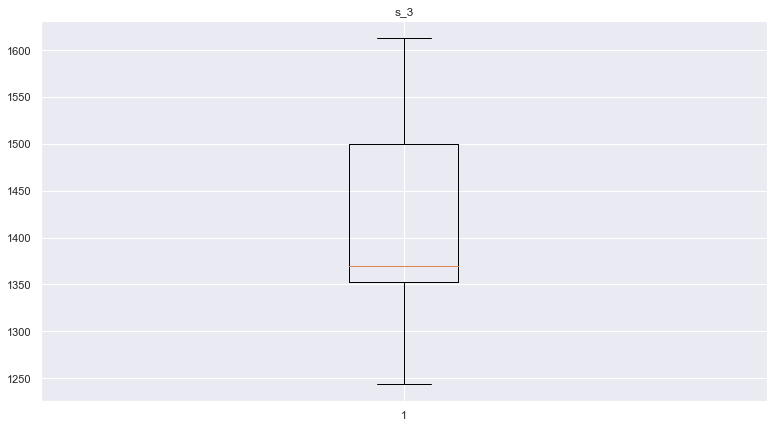

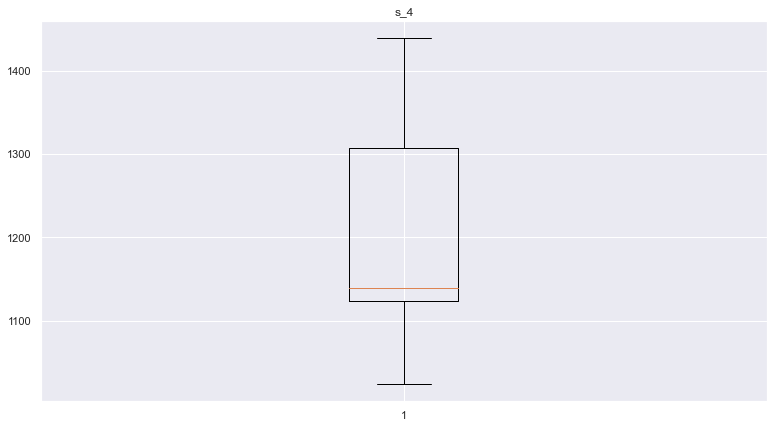

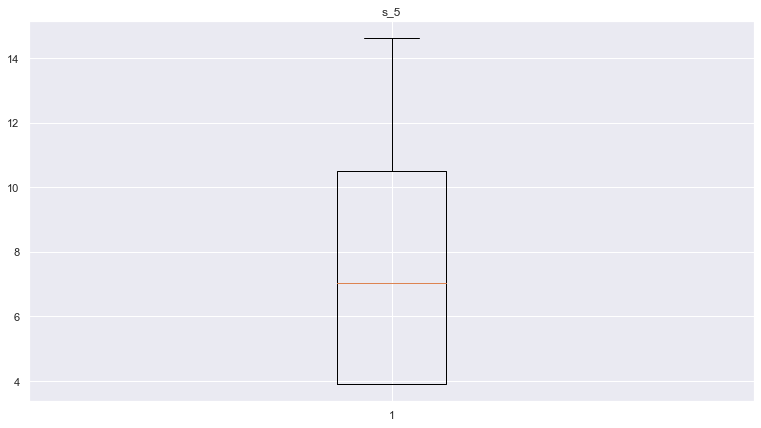

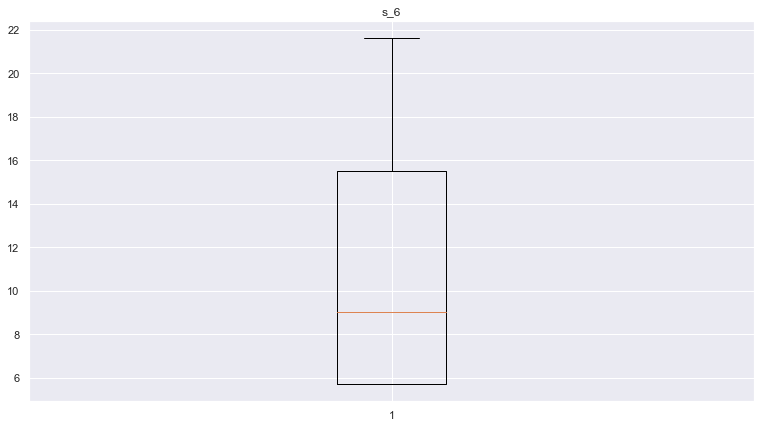

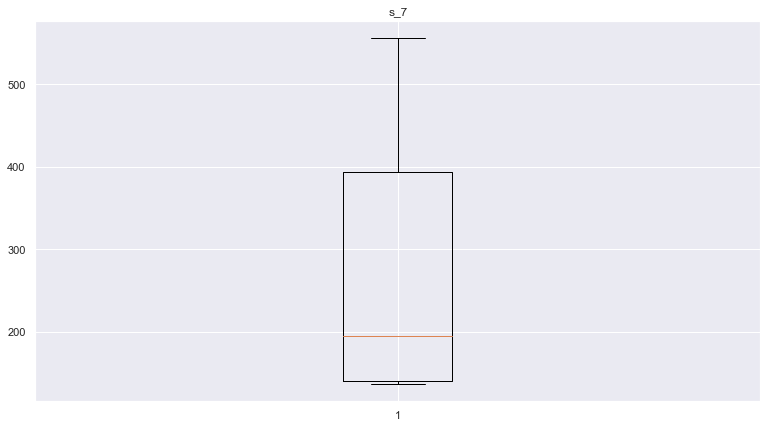

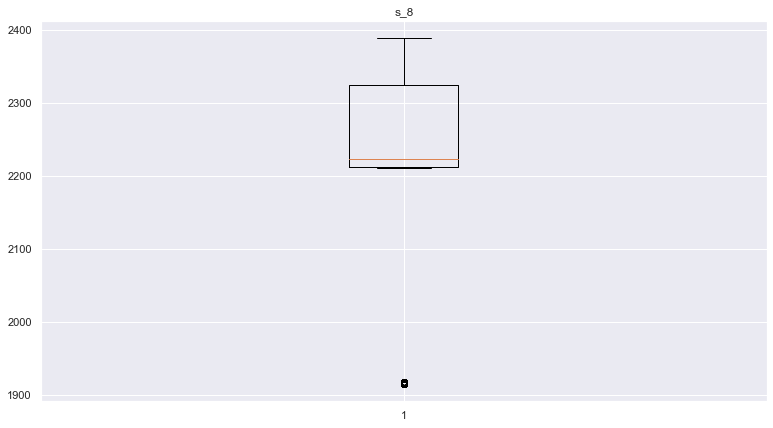

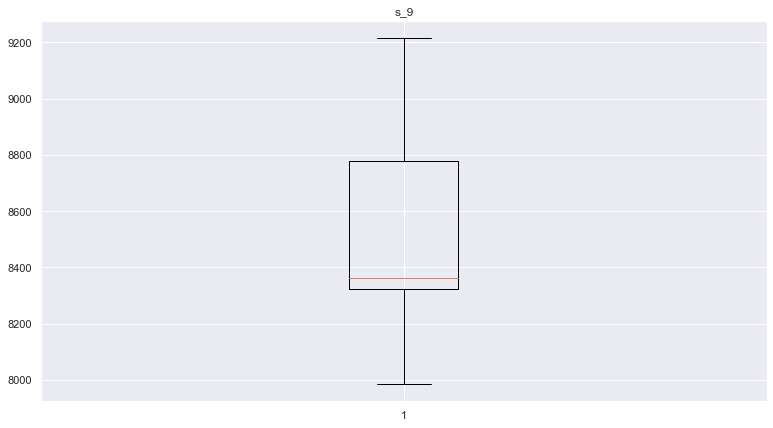

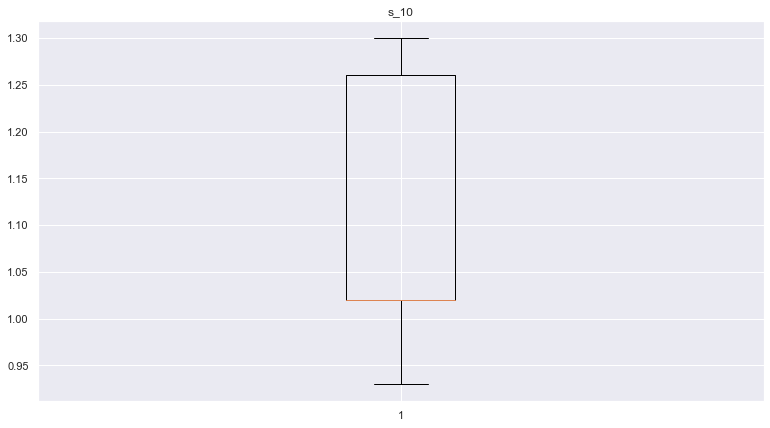

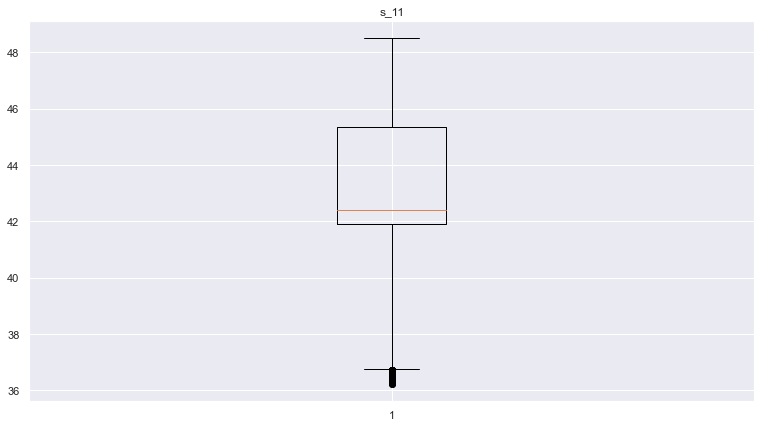

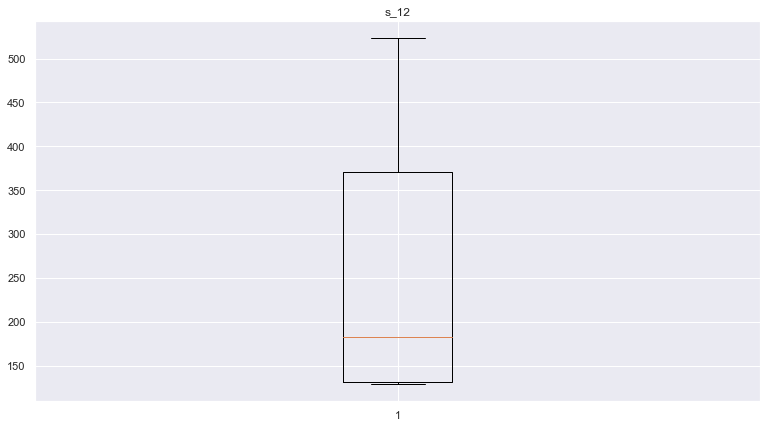

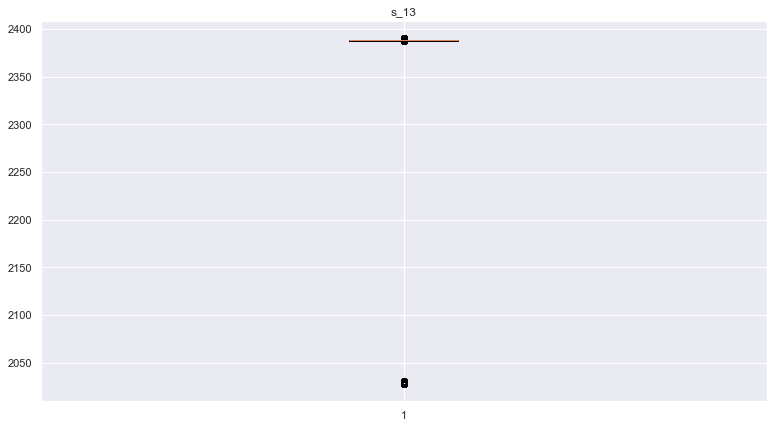

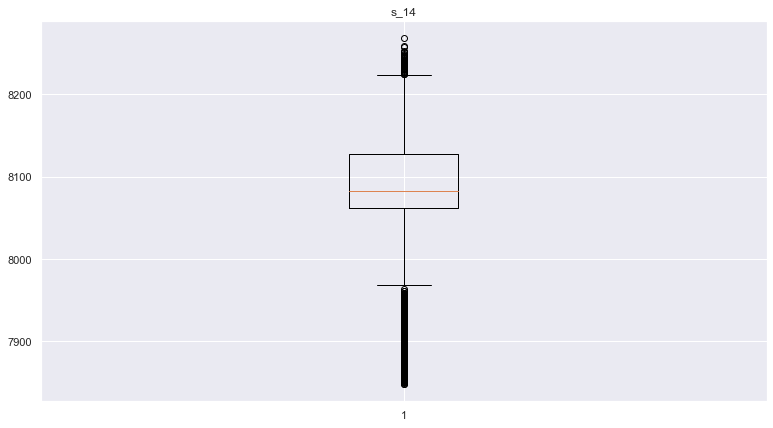

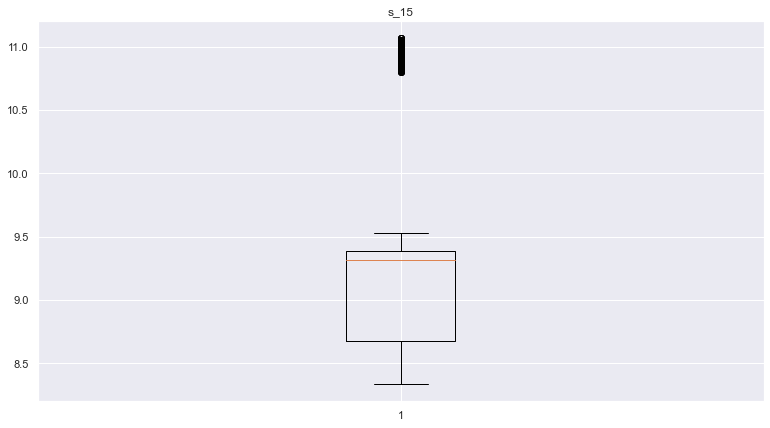

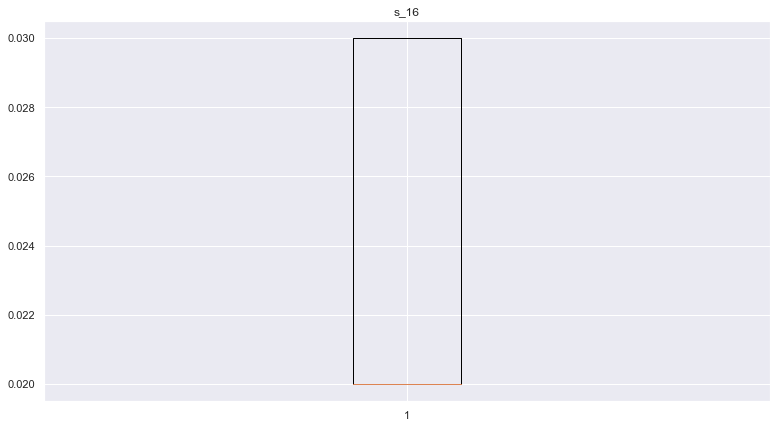

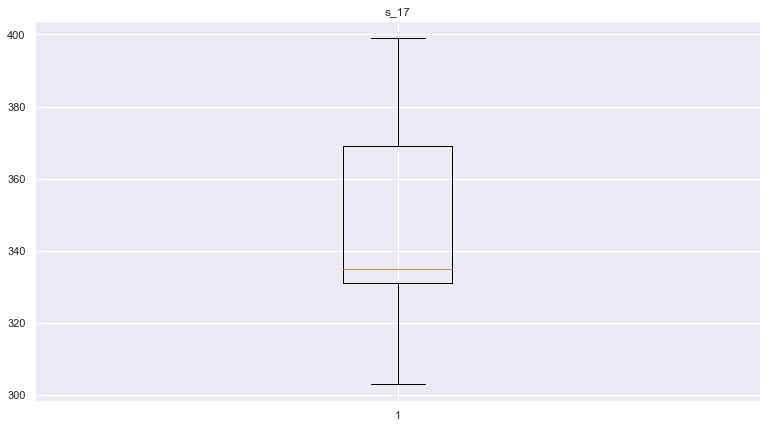

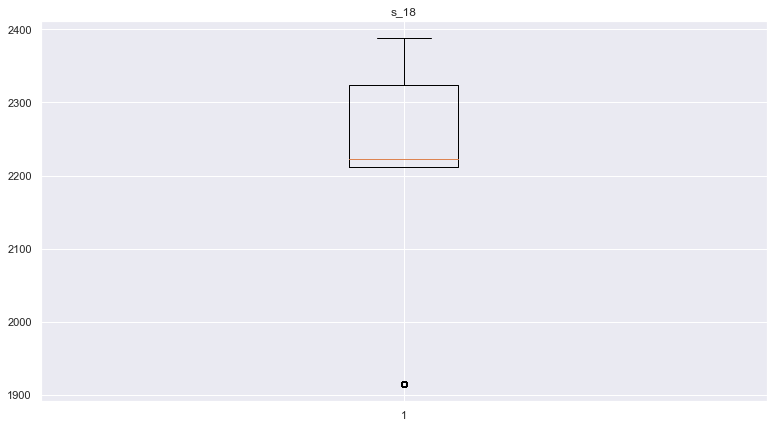

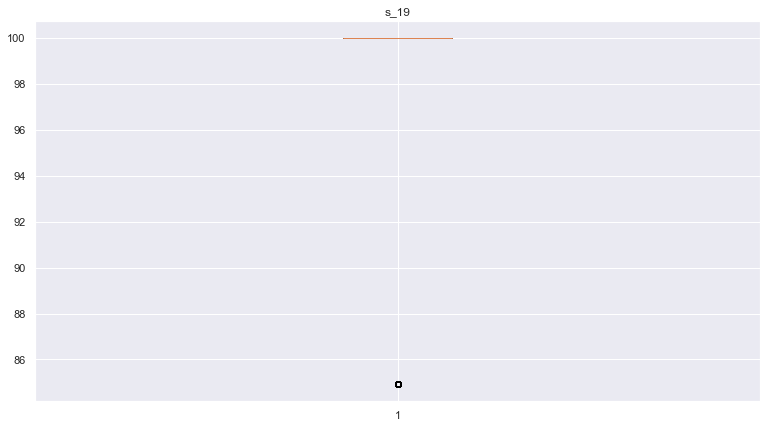

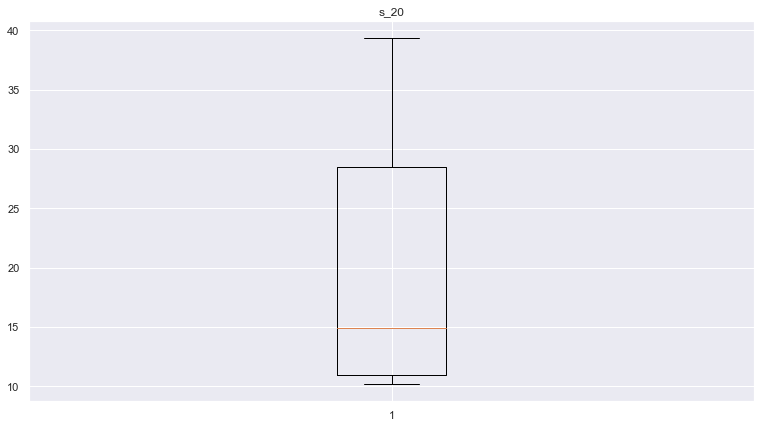

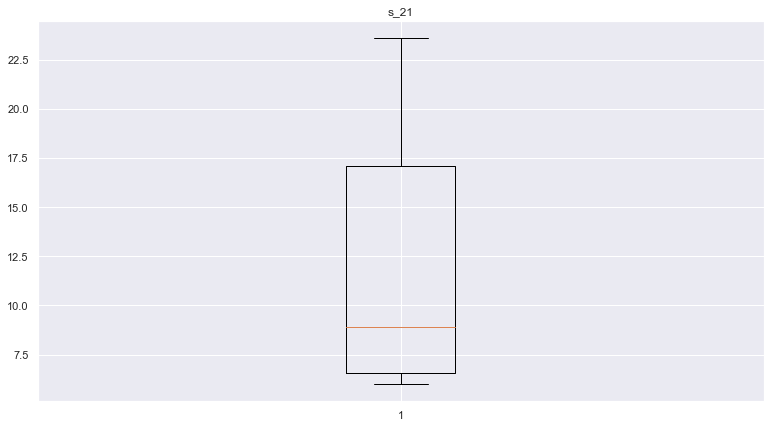

In [19]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

## Max time cycle found for each Unit

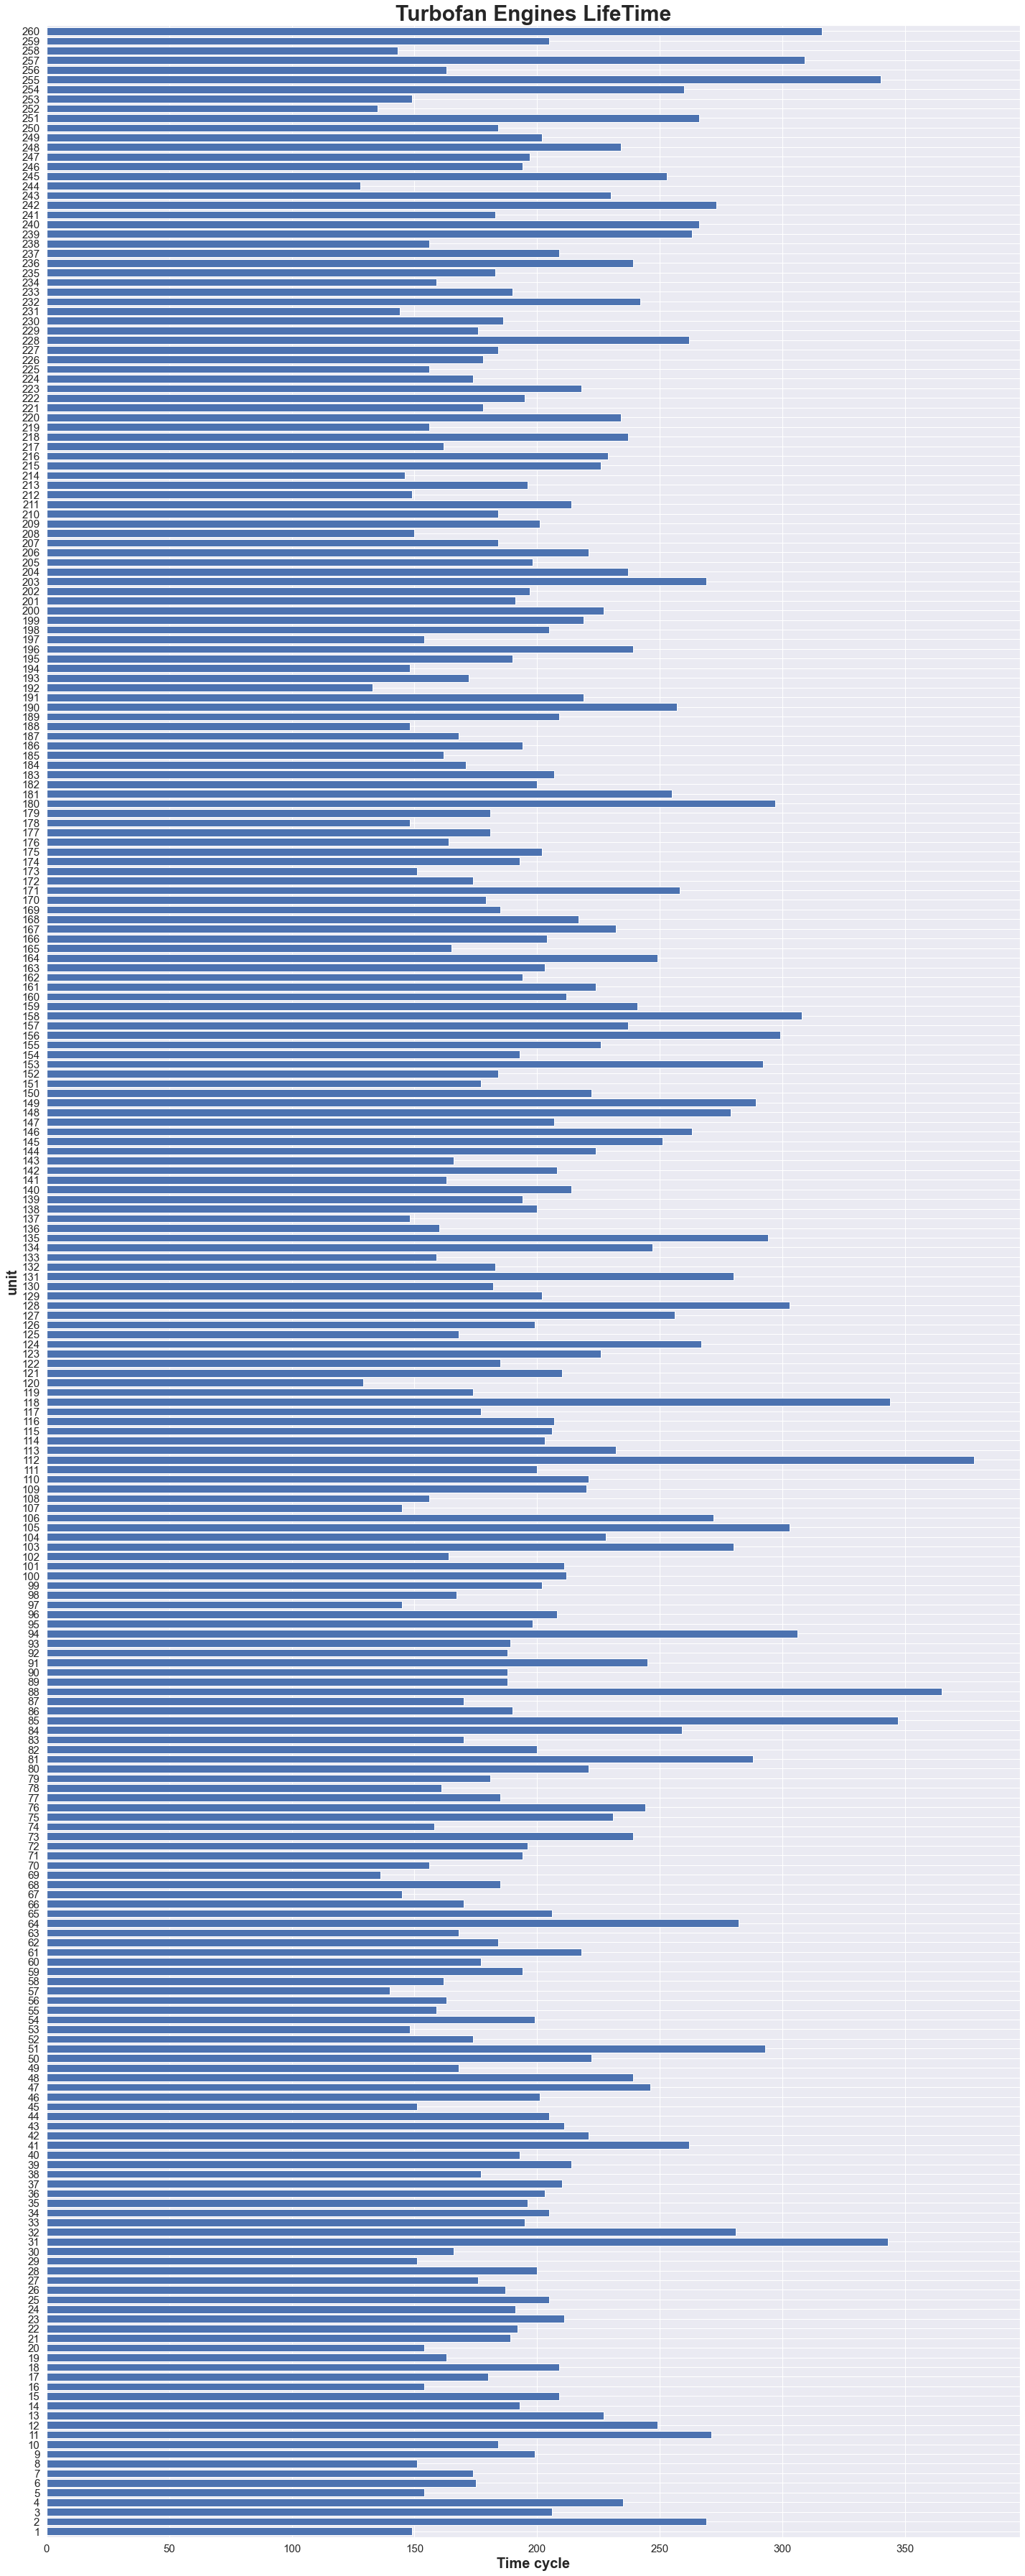

In [20]:
max_time_cycles=train[index_names].groupby('unit_nr').max()
plt.figure(figsize=(20,50))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 8.959999999999994, 'max time cycle')

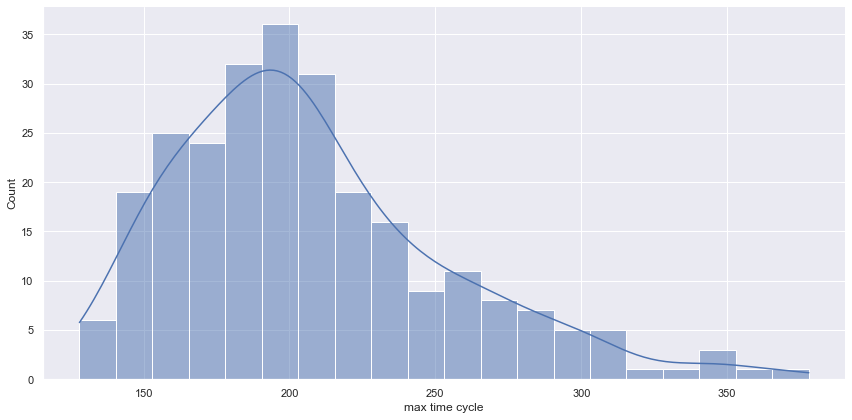

In [21]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

## Extraction of only Important Features which have strong relation affecting RUL of engine

In [22]:
# This is done to select only important features for model building in order to avoid problem of " Overfitting".

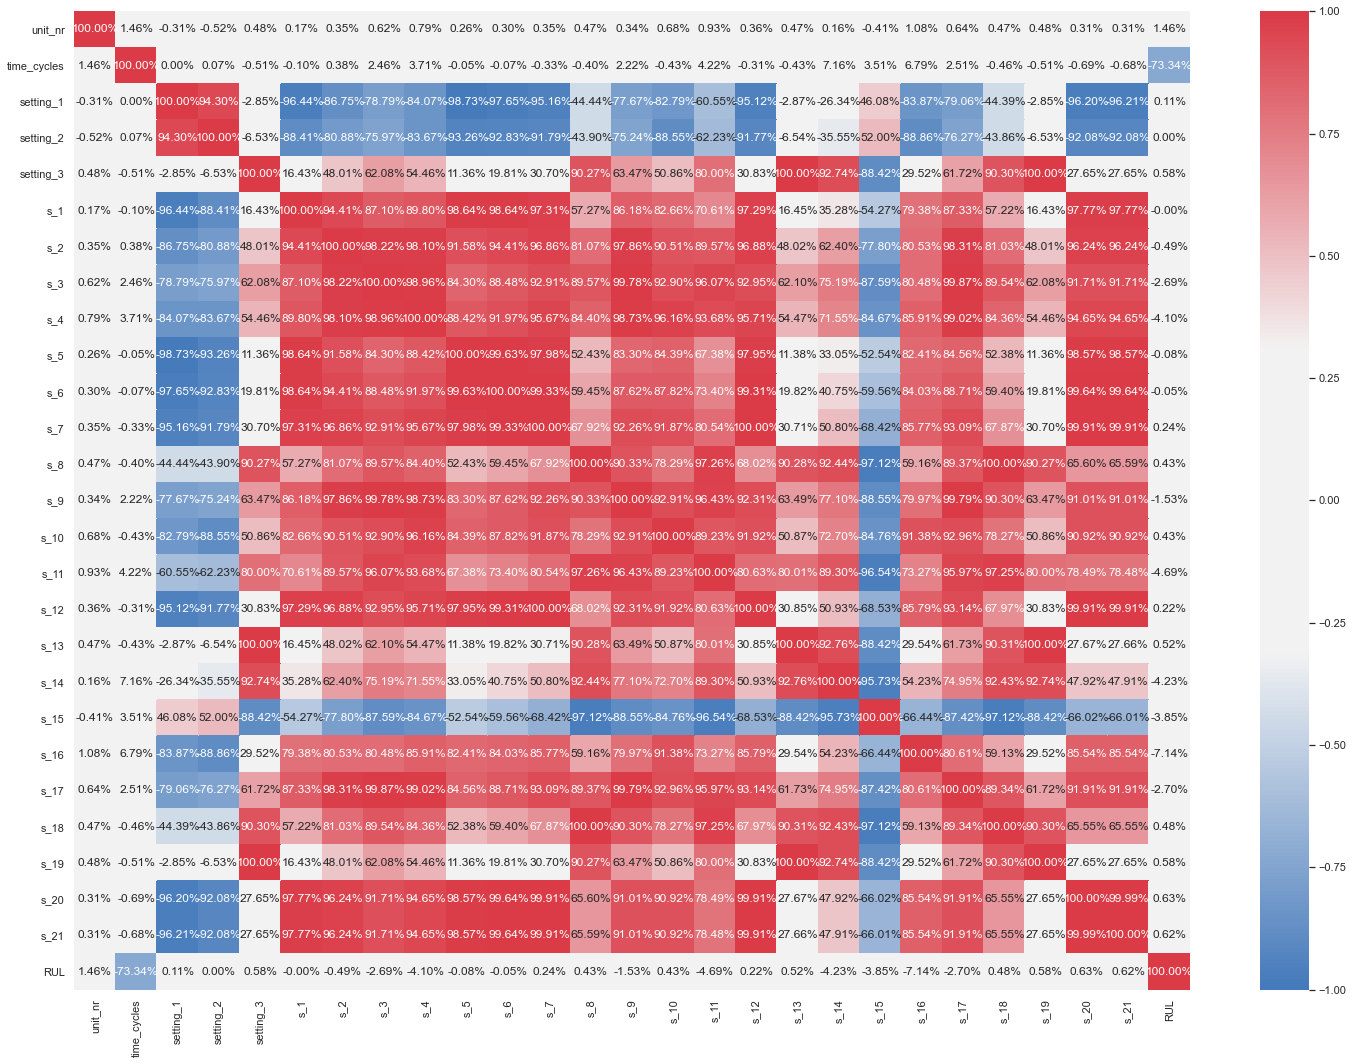

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(25, 18))
correlation_matrix = train.corr()

# Define a custom color map with varying shades
cmap = sns.diverging_palette(250, 10, sep=80, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt='.2%', vmin=-1, vmax=1)
plt.show()


From the above heatmap we can see all the features are correlated with each other

In [24]:
train.head(5)

unit_nr  time_cycles  setting_1  setting_2  setting_3     s_1     s_2  \
0        1            1    34.9983     0.8400      100.0  449.44  555.32   
1        1            2    41.9982     0.8408      100.0  445.00  549.90   
2        1            3    24.9988     0.6218       60.0  462.54  537.31   
3        1            4    42.0077     0.8416      100.0  445.00  549.51   
4        1            5    25.0005     0.6203       60.0  462.54  537.07   

       s_3      s_4   s_5  ...     s_13     s_14     s_15  s_16  s_17  s_18  \
0  1358.61  1137.23  5.48  ...  2387.72  8048.56   9.3461  0.02   334  2223   
1  1353.22  1125.78  3.91  ...  2387.66  8072.30   9.3774  0.02   330  2212   
2  1256.76  1047.45  7.05  ...  2028.03  7864.87  10.8941  0.02   309  1915   
3  1354.03  1126.38  3.91  ...  2387.61  8068.66   9.3528  0.02   329  2212   
4  1257.71  1047.93  7.05  ...  2028.00  7861.23  10.8963  0.02   309  1915   

     s_19   s_20    s_21  RUL  
0  100.00  14.73  8.8071  148  
1  100.00  10.41  6.2665  147  
2   84.93  14.08  8.6723  146  
3  100.00  10.59  6.4701  145  
4   84.93  14.13  8.5286  144  

[5 rows x 27 columns]

array([[<AxesSubplot:title={'center':'s_1'}>,
        <AxesSubplot:title={'center':'s_2'}>,
        <AxesSubplot:title={'center':'s_3'}>,
        <AxesSubplot:title={'center':'s_4'}>,
        <AxesSubplot:title={'center':'s_5'}>],
       [<AxesSubplot:title={'center':'s_6'}>,
        <AxesSubplot:title={'center':'s_7'}>,
        <AxesSubplot:title={'center':'s_8'}>,
        <AxesSubplot:title={'center':'s_9'}>,
        <AxesSubplot:title={'center':'s_10'}>],
       [<AxesSubplot:title={'center':'s_11'}>,
        <AxesSubplot:title={'center':'s_12'}>,
        <AxesSubplot:title={'center':'s_13'}>,
        <AxesSubplot:title={'center':'s_14'}>,
        <AxesSubplot:title={'center':'s_15'}>],
       [<AxesSubplot:title={'center':'s_16'}>,
        <AxesSubplot:title={'center':'s_17'}>,
        <AxesSubplot:title={'center':'s_18'}>,
        <AxesSubplot:title={'center':'s_19'}>,
        <AxesSubplot:title={'center':'s_20'}>],
       [<AxesSubplot:title={'center':'s_21'}>, <AxesSubplot:>,
  

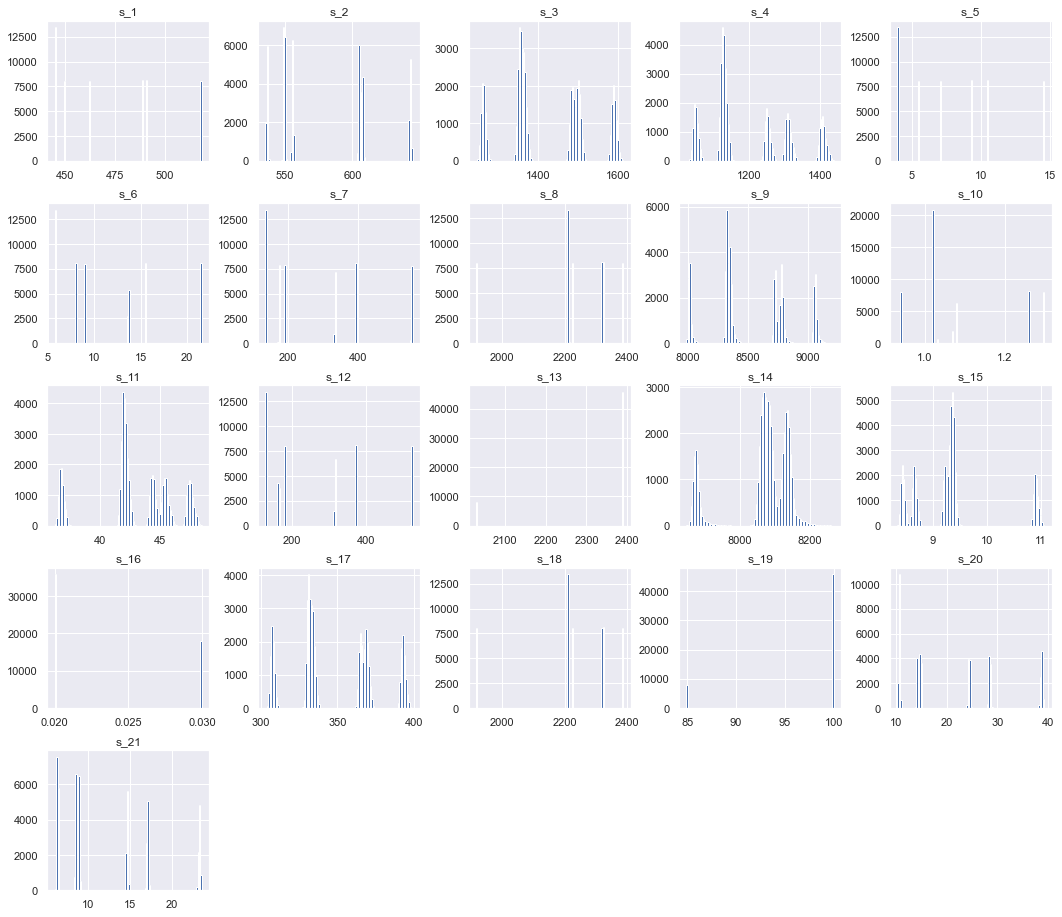

In [25]:
sensor_names=['s_{}'.format(i) for i in range(1,22) ]
pd.DataFrame(train,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(18,16))

## Seperating Train & Test Data

In [26]:
# train & y_train
# Calculated RUL variable is our Target variable.
y_train=train['RUL']
X_train=train.drop(['unit_nr','time_cycles','RUL'],axis=1)
X_train.head(5)

setting_1  setting_2  setting_3     s_1     s_2      s_3      s_4   s_5  \
0    34.9983     0.8400      100.0  449.44  555.32  1358.61  1137.23  5.48   
1    41.9982     0.8408      100.0  445.00  549.90  1353.22  1125.78  3.91   
2    24.9988     0.6218       60.0  462.54  537.31  1256.76  1047.45  7.05   
3    42.0077     0.8416      100.0  445.00  549.51  1354.03  1126.38  3.91   
4    25.0005     0.6203       60.0  462.54  537.07  1257.71  1047.93  7.05   

    s_6     s_7  ...    s_12     s_13     s_14     s_15  s_16  s_17  s_18  \
0  8.00  194.64  ...  183.06  2387.72  8048.56   9.3461  0.02   334  2223   
1  5.71  138.51  ...  130.42  2387.66  8072.30   9.3774  0.02   330  2212   
2  9.02  175.71  ...  164.22  2028.03  7864.87  10.8941  0.02   309  1915   
3  5.71  138.46  ...  130.72  2387.61  8068.66   9.3528  0.02   329  2212   
4  9.03  175.05  ...  164.31  2028.00  7861.23  10.8963  0.02   309  1915   

     s_19   s_20    s_21  
0  100.00  14.73  8.8071  
1  100.00  10.41  6.2665  
2   84.93  14.08  8.6723  
3  100.00  10.59  6.4701  
4   84.93  14.13  8.5286  

[5 rows x 24 columns]

In [27]:
test.head(5)

setting_1  setting_2  setting_3     s_1     s_2      s_3      s_4    s_5  \
0    10.0076     0.2501      100.0  489.05  605.42  1515.00  1325.07  10.52   
1     0.0018     0.0000      100.0  518.67  642.67  1591.67  1418.17  14.62   
2    35.0015     0.8412      100.0  449.44  555.86  1370.62  1135.59   5.48   
3    20.0032     0.7000      100.0  491.19  607.99  1487.94  1257.49   9.35   
4    42.0055     0.8400      100.0  445.00  550.81  1358.95  1140.34   3.91   

     s_6     s_7  ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18  \
0  15.50  393.58  ...  370.87  2388.32  8167.06  8.7456  0.03   371  2319   
1  21.61  553.36  ...  521.10  2388.12  8138.12  8.4248  0.03   393  2388   
2   8.00  194.58  ...  183.11  2388.07  8071.23  9.3094  0.02   332  2223   
3  13.66  334.39  ...  314.88  2388.12  8062.39  9.2349  0.02   365  2324   
4   5.72  138.42  ...  130.82  2389.06  8140.94  9.3964  0.02   333  2212   

    s_19   s_20     s_21  
0  100.0  28.30  17.0934  
1  100.0  38.82  23.3463  
2  100.0  14.75   8.9589  
3  100.0  24.22  14.6814  
4  100.0  10.34   6.3601  

[5 rows x 24 columns]

In [28]:
# Check the columns in X_train
print(X_train.columns)

# Test data set, keeping only train columns/features.
X_test = test[X_train.columns]
X_test.head(5)


Index(['setting_1', 'setting_2', 'setting_3', 's_1', 's_2', 's_3', 's_4',
       's_5', 's_6', 's_7', 's_8', 's_9', 's_10', 's_11', 's_12', 's_13',
       's_14', 's_15', 's_16', 's_17', 's_18', 's_19', 's_20', 's_21'],
      dtype='object')


setting_1  setting_2  setting_3     s_1     s_2      s_3      s_4    s_5  \
0    10.0076     0.2501      100.0  489.05  605.42  1515.00  1325.07  10.52   
1     0.0018     0.0000      100.0  518.67  642.67  1591.67  1418.17  14.62   
2    35.0015     0.8412      100.0  449.44  555.86  1370.62  1135.59   5.48   
3    20.0032     0.7000      100.0  491.19  607.99  1487.94  1257.49   9.35   
4    42.0055     0.8400      100.0  445.00  550.81  1358.95  1140.34   3.91   

     s_6     s_7  ...    s_12     s_13     s_14    s_15  s_16  s_17  s_18  \
0  15.50  393.58  ...  370.87  2388.32  8167.06  8.7456  0.03   371  2319   
1  21.61  553.36  ...  521.10  2388.12  8138.12  8.4248  0.03   393  2388   
2   8.00  194.58  ...  183.11  2388.07  8071.23  9.3094  0.02   332  2223   
3  13.66  334.39  ...  314.88  2388.12  8062.39  9.2349  0.02   365  2324   
4   5.72  138.42  ...  130.82  2389.06  8140.94  9.3964  0.02   333  2212   

    s_19   s_20     s_21  
0  100.0  28.30  17.0934  
1  100.0  38.82  23.3463  
2  100.0  14.75   8.9589  
3  100.0  24.22  14.6814  
4  100.0  10.34   6.3601  

[5 rows x 24 columns]

In [29]:
y_test.head(5)

RUL
0   18
1   79
2  106
3  110
4   15

In [30]:
y_train.describe()

count    53759.000000
mean       108.154746
std         69.180569
min          0.000000
25%         51.000000
50%        103.000000
75%        156.000000
max        377.000000
Name: RUL, dtype: float64

In [31]:
# Clipping of RUL at 103 , RUL is left skewed.
# This is done to improve performance of the applied models.

y_train= y_train.clip(upper=103)
y_train.head(5)

0    103
1    103
2    103
3    103
4    103
Name: RUL, dtype: int64

In [32]:
y_test.describe()

RUL
count  259.000000
mean    81.185328
std     53.882916
min      6.000000
25%     35.000000
50%     80.000000
75%    121.000000
max    194.000000

In [33]:
y_test= y_test.clip(upper=103)
y_test.head(5)

RUL
0   18
1   79
2  103
3  103
4   15

## Building Model

In [34]:
# first create an evaluate function
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))
    return rmse,variance;

## Bi-LSTM model

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
# Model 8: Bidirectional LSTM
def build_bilstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=input_shape))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [37]:
# Preprocess data for LSTM
scaler_lstm = StandardScaler()
X_train_lstm = scaler_lstm.fit_transform(X_train)
X_test_lstm = scaler_lstm.transform(X_test)

In [38]:
# Reshape input for LSTM (assuming your data is sequential)
X_train_lstm = X_train_lstm.reshape((X_train_lstm.shape[0], 1, X_train_lstm.shape[1]))
X_test_lstm = X_test_lstm.reshape((X_test_lstm.shape[0], 1, X_test_lstm.shape[1]))


In [39]:
# Build and train the Bidirectional LSTM model
input_shape = (X_train_lstm.shape[1], X_train_lstm.shape[2])
bilstm_model = build_bilstm_model(input_shape)


In [40]:
# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [41]:
# Train the model
bilstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
1344/1344 [==============================] - 5s 2ms/step - loss: 1850.1536 - mae: 35.5165 - val_loss: 1006.2261 - val_mae: 27.1899
Epoch 2/50
1344/1344 [==============================] - 3s 2ms/step - loss: 829.3862 - mae: 24.9301 - val_loss: 683.6179 - val_mae: 22.8063
Epoch 3/50
1344/1344 [==============================] - 3s 2ms/step - loss: 556.0192 - mae: 19.6572 - val_loss: 466.9680 - val_mae: 18.0477
Epoch 4/50
1344/1344 [==============================] - 3s 2ms/step - loss: 403.4759 - mae: 16.0930 - val_loss: 363.9646 - val_mae: 14.9228
Epoch 5/50
1344/1344 [==============================] - 3s 2ms/step - loss: 337.0343 - mae: 14.5810 - val_loss: 322.5736 - val_mae: 14.2403
Epoch 6/50
1344/1344 [==============================] - 3s 2ms/step - loss: 312.9315 - mae: 14.0628 - val_loss: 328.8797 - val_mae: 14.6331
Epoch 7/50
1344/1344 [==============================] - 3s 2ms/step - loss: 303.0905 - mae: 13.8338 - val_loss: 300.1420 - val_mae: 13.8686
Epoch 8/50
1344/13

In [42]:
# Evaluate on train data
y_hat_train_lstm = bilstm_model.predict(X_train_lstm)
RMSE_Train_LSTM, R2_Train_LSTM = evaluate(y_train, y_hat_train_lstm, 'train')

1680/1680 [==============================] - 2s 1ms/step
train set RMSE:16.082522518595834, R2:0.7683105937113526


In [43]:
# Evaluate on test data
y_hat_test_lstm = bilstm_model.predict(X_test_lstm)
RMSE_Test_LSTM, R2_Test_LSTM = evaluate(y_test, y_hat_test_lstm, 'test')


9/9 [==============================] - 0s 2ms/step
test set RMSE:16.066885515936935, R2:0.8049165640888764


In [44]:
# Make Dataframe which will contain results of all applied Model
Results=pd.DataFrame({'Model': ['BiLSTM'],
    'RMSE-Train': [RMSE_Train_LSTM],
    'R2-Train': [R2_Train_LSTM],
    'RMSE-Test': [RMSE_Test_LSTM],
    'R2-Test': [R2_Test_LSTM]})
Results

Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0  BiLSTM   16.082523  0.768311  16.066886  0.804917

## Bi-TRNN model

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Model: Bidirectional TRNN (replace with your desired function name)
def Bi_trnn(input_shape):
    model = Sequential()
    model.add(Bidirectional(SimpleRNN(50, activation='relu'), input_shape=input_shape))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

# Preprocess data for Bi-TRNN
scaler_bi_trnn = StandardScaler()
X_train_bi_trnn = scaler_bi_trnn.fit_transform(X_train)
X_test_bi_trnn = scaler_bi_trnn.transform(X_test)

# Reshape input for Bi-TRNN (assuming your data is sequential)
X_train_bi_trnn = X_train_bi_trnn.reshape((X_train_bi_trnn.shape[0], X_train_bi_trnn.shape[1], 1))
X_test_bi_trnn = X_test_bi_trnn.reshape((X_test_bi_trnn.shape[0], X_test_bi_trnn.shape[1], 1))

# Build and train the Bidirectional TRNN model
input_shape_bi_trnn = (X_train_bi_trnn.shape[1], X_train_bi_trnn.shape[2])
bi_trnn_model = Bi_trnn(input_shape_bi_trnn)

# Define early stopping to prevent overfitting
early_stopping_bi_trnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
bi_trnn_model.fit(X_train_bi_trnn, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_bi_trnn])

# Evaluate on train data
y_hat_train_bi_trnn = bi_trnn_model.predict(X_train_bi_trnn)
RMSE_Train_BiTRNN, R2_Train_BiTRNN = evaluate(y_train, y_hat_train_bi_trnn, 'train')

# Evaluate on test data
y_hat_test_bi_trnn = bi_trnn_model.predict(X_test_bi_trnn)
RMSE_Test_BiTRNN, R2_Test_BiTRNN = evaluate(y_test, y_hat_test_bi_trnn, 'test')

# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['BiTRNN'],
    'RMSE-Train': [RMSE_Train_BiTRNN],
    'R2-Train': [R2_Train_BiTRNN],
    'RMSE-Test': [RMSE_Test_BiTRNN],
    'R2-Test': [R2_Test_BiTRNN]
}), ignore_index=True)

# Display the results DataFrame
Results


Epoch 1/50
1344/1344 [==============================] - 8s 5ms/step - loss: 1074.5336 - mae: 26.4713 - val_loss: 423.7823 - val_mae: 15.2556
Epoch 2/50
1344/1344 [==============================] - 7s 5ms/step - loss: 423.2709 - mae: 15.7575 - val_loss: 347.0812 - val_mae: 14.0120
Epoch 3/50
1344/1344 [==============================] - 7s 5ms/step - loss: 386.0217 - mae: 14.8885 - val_loss: 428.6264 - val_mae: 15.0435
Epoch 4/50
1344/1344 [==============================] - 7s 5ms/step - loss: 376.1880 - mae: 14.6840 - val_loss: 466.8818 - val_mae: 15.2281
Epoch 5/50
1344/1344 [==============================] - 7s 5ms/step - loss: 361.7896 - mae: 14.3187 - val_loss: 347.7979 - val_mae: 13.5793
Epoch 6/50
1344/1344 [==============================] - 7s 5ms/step - loss: 355.8010 - mae: 14.1481 - val_loss: 391.0566 - val_mae: 15.9952
Epoch 7/50
1344/1344 [==============================] - 7s 5ms/step - loss: 348.3078 - mae: 13.9823 - val_loss: 302.0144 - val_mae: 12.8900
Epoch 8/50
1344/134

Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0  BiLSTM   16.082523  0.768311  16.066886  0.804917
1  BiTRNN   16.492995  0.756333  15.512946  0.818136

## Bi-GRU model

In [46]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [47]:
# Model: Bidirectional GRU (Bi-GRU)
def build_bi_gru_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(GRU(50, activation='relu'), input_shape=input_shape))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [48]:
# Preprocess data for GRU
scaler_bi_gru = StandardScaler()
X_train_bi_gru = scaler_bi_gru.fit_transform(X_train)
X_test_bi_gru = scaler_bi_gru.transform(X_test)


In [49]:
# Reshape input for GRU (assuming your data is sequential)
X_train_bi_gru = X_train_bi_gru.reshape((X_train_bi_gru.shape[0], 1, X_train_bi_gru.shape[1]))
X_test_bi_gru = X_test_bi_gru.reshape((X_test_bi_gru.shape[0], 1, X_test_bi_gru.shape[1]))


In [50]:
# Build and train the Bidirectional GRU model
input_shape_bi_gru = (X_train_bi_gru.shape[1], X_train_bi_gru.shape[2])
bi_gru_model = build_bi_gru_model(input_shape_bi_gru)


In [51]:
# Define early stopping to prevent overfitting
early_stopping_bi_gru = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [52]:
# Train the model
bi_gru_model.fit(X_train_bi_gru, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_bi_gru])


Epoch 1/50
1344/1344 [==============================] - 5s 3ms/step - loss: 1844.1227 - mae: 35.5204 - val_loss: 980.8911 - val_mae: 27.2123
Epoch 2/50
1344/1344 [==============================] - 3s 2ms/step - loss: 800.9426 - mae: 24.4331 - val_loss: 665.2689 - val_mae: 21.6720
Epoch 3/50
1344/1344 [==============================] - 3s 2ms/step - loss: 549.8741 - mae: 19.4238 - val_loss: 463.9639 - val_mae: 17.5317
Epoch 4/50
1344/1344 [==============================] - 3s 2ms/step - loss: 393.9044 - mae: 15.9017 - val_loss: 364.1202 - val_mae: 15.5194
Epoch 5/50
1344/1344 [==============================] - 3s 2ms/step - loss: 324.9458 - mae: 14.3218 - val_loss: 322.5406 - val_mae: 14.5198
Epoch 6/50
1344/1344 [==============================] - 3s 2ms/step - loss: 302.3317 - mae: 13.7762 - val_loss: 299.3889 - val_mae: 13.8011
Epoch 7/50
1344/1344 [==============================] - 3s 2ms/step - loss: 292.1155 - mae: 13.5330 - val_loss: 307.2329 - val_mae: 14.0931
Epoch 8/50
1344/134

In [53]:
# Evaluate on train data
y_hat_train_bi_gru = bi_gru_model.predict(X_train_bi_gru)
RMSE_Train_BiGRU, R2_Train_BiGRU = evaluate(y_train, y_hat_train_bi_gru, 'train')


1680/1680 [==============================] - 2s 964us/step
train set RMSE:15.800731013817517, R2:0.7763586011512011


In [54]:
# Evaluate on test data
y_hat_test_bi_gru = bi_gru_model.predict(X_test_bi_gru)
RMSE_Test_BiGRU, R2_Test_BiGRU = evaluate(y_test, y_hat_test_bi_gru, 'test')


9/9 [==============================] - 0s 2ms/step
test set RMSE:15.72567935845028, R2:0.8131144038252606


In [55]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['BiGRU'],
    'RMSE-Train': [RMSE_Train_BiGRU],
    'R2-Train': [R2_Train_BiGRU],
    'RMSE-Test': [RMSE_Test_BiGRU],
    'R2-Test': [R2_Test_BiGRU]
}), ignore_index=True)


In [56]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0  BiLSTM   16.082523  0.768311  16.066886  0.804917
1  BiTRNN   16.492995  0.756333  15.512946  0.818136
2   BiGRU   15.800731  0.776359  15.725679  0.813114

## Prognet model

In [57]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping


In [58]:
# Model: ProgNet (Progressive Neural Network)
def build_prognet_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [59]:
# Preprocess data for ProgNet
scaler_prognet = StandardScaler()
X_train_prognet = scaler_prognet.fit_transform(X_train)
X_test_prognet = scaler_prognet.transform(X_test)


In [60]:
# Reshape input for LSTM (assuming your data is sequential)
X_train_prognet = X_train_prognet.reshape((X_train_prognet.shape[0], X_train_prognet.shape[1], 1))

# Build and train the ProgNet model
input_shape_prognet = (X_train_prognet.shape[1], X_train_prognet.shape[2])
prognet_model = build_prognet_model(input_shape_prognet)


In [61]:
# Define early stopping to prevent overfitting
early_stopping_prognet = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [62]:
# Train the model
prognet_model.fit(X_train_prognet, y_train, epochs=70, batch_size=32, validation_split=0.2, callbacks=[early_stopping_prognet])


Epoch 1/70
1344/1344 [==============================] - 19s 13ms/step - loss: 1313.6986 - mae: 30.7290 - val_loss: 1123.1091 - val_mae: 29.5541
Epoch 2/70
1344/1344 [==============================] - 17s 12ms/step - loss: 1133.3811 - mae: 29.2034 - val_loss: 1127.1659 - val_mae: 29.7925
Epoch 3/70
1344/1344 [==============================] - 17s 12ms/step - loss: 1126.9852 - mae: 29.1381 - val_loss: 1122.8829 - val_mae: 29.8452
Epoch 4/70
1344/1344 [==============================] - 17s 12ms/step - loss: 1129.7620 - mae: 29.1560 - val_loss: 1128.1963 - val_mae: 28.5963
Epoch 5/70
1344/1344 [==============================] - 17s 13ms/step - loss: 1004.7743 - mae: 26.9641 - val_loss: 668.6201 - val_mae: 22.0360
Epoch 6/70
1344/1344 [==============================] - 17s 12ms/step - loss: 545.1629 - mae: 17.9945 - val_loss: 461.8305 - val_mae: 14.8285
Epoch 7/70
1344/1344 [==============================] - 17s 12ms/step - loss: 398.7205 - mae: 14.7475 - val_loss: 663.8511 - val_mae: 20.16

In [63]:
# Evaluate on train data
y_hat_train_prognet = prognet_model.predict(X_train_prognet)
RMSE_Train_ProgNet, R2_Train_ProgNet = evaluate(y_train, y_hat_train_prognet, 'train')


1680/1680 [==============================] - 8s 5ms/step
train set RMSE:15.469126757910352, R2:0.7856470638635763


In [64]:
# Reshape input for LSTM (assuming your data is sequential)
X_test_prognet = X_test_prognet.reshape((X_test_prognet.shape[0], X_test_prognet.shape[1], 1))

# Evaluate on test data
y_hat_test_prognet = prognet_model.predict(X_test_prognet)

# Now you can proceed with the evaluation
RMSE_Test_ProgNet, R2_Test_ProgNet = evaluate(y_test, y_hat_test_prognet, 'test')


9/9 [==============================] - 0s 5ms/step
test set RMSE:14.412868051096407, R2:0.8430151222430172


In [65]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['ProgNet'],
    'RMSE-Train': [RMSE_Train_ProgNet],
    'R2-Train': [R2_Train_ProgNet],
    'RMSE-Test': [RMSE_Test_ProgNet],
    'R2-Test': [R2_Test_ProgNet]
}), ignore_index=True)

In [66]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0   BiLSTM   16.082523  0.768311  16.066886  0.804917
1   BiTRNN   16.492995  0.756333  15.512946  0.818136
2    BiGRU   15.800731  0.776359  15.725679  0.813114
3  ProgNet   15.469127  0.785647  14.412868  0.843015

## DCNN model

In [67]:
# Import necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
# Model: Deep Convolutional Neural Network (DCNN)
def build_dcnn_model(input_shape):
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [69]:
# Preprocess data for DCNN
scaler_dcnn = StandardScaler()
X_train_dcnn = scaler_dcnn.fit_transform(X_train)
X_test_dcnn = scaler_dcnn.transform(X_test)

In [70]:
# Reshape input for DCNN (assuming your data is sequential)
X_train_dcnn = X_train_dcnn.reshape((X_train_dcnn.shape[0], X_train_dcnn.shape[1], 1))
X_test_dcnn = X_test_dcnn.reshape((X_test_dcnn.shape[0], X_test_dcnn.shape[1], 1))


In [71]:
# Build and train the DCNN model
input_shape_dcnn = (X_train_dcnn.shape[1], X_train_dcnn.shape[2])
dcnn_model = build_dcnn_model(input_shape_dcnn)

In [72]:
# Define early stopping to prevent overfitting
early_stopping_dcnn = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [73]:
# Train the model
dcnn_model.fit(X_train_dcnn, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping_dcnn])


Epoch 1/50
1344/1344 [==============================] - 4s 2ms/step - loss: 1269.7598 - mae: 30.1595 - val_loss: 957.0369 - val_mae: 27.1433
Epoch 2/50
1344/1344 [==============================] - 3s 2ms/step - loss: 730.9807 - mae: 22.3425 - val_loss: 520.4960 - val_mae: 18.4834
Epoch 3/50
1344/1344 [==============================] - 3s 2ms/step - loss: 428.2596 - mae: 16.0867 - val_loss: 416.7579 - val_mae: 16.8453
Epoch 4/50
1344/1344 [==============================] - 3s 2ms/step - loss: 332.1649 - mae: 14.1823 - val_loss: 332.0323 - val_mae: 14.6450
Epoch 5/50
1344/1344 [==============================] - 9s 7ms/step - loss: 301.5972 - mae: 13.4382 - val_loss: 286.3803 - val_mae: 13.1881
Epoch 6/50
1344/1344 [==============================] - 4s 3ms/step - loss: 283.4903 - mae: 12.9183 - val_loss: 275.7010 - val_mae: 12.9479
Epoch 7/50
1344/1344 [==============================] - 5s 3ms/step - loss: 273.7010 - mae: 12.6175 - val_loss: 275.8374 - val_mae: 12.8461
Epoch 8/50
1344/134

In [74]:
# Evaluate on train data
y_hat_train_dcnn = dcnn_model.predict(X_train_dcnn)
RMSE_Train_DCNN, R2_Train_DCNN = evaluate(y_train, y_hat_train_dcnn, 'train')


1680/1680 [==============================] - 3s 2ms/step
train set RMSE:15.3054834829255, R2:0.7901582273259089


In [75]:
# Evaluate on test data
y_hat_test_dcnn = dcnn_model.predict(X_test_dcnn)
RMSE_Test_DCNN, R2_Test_DCNN = evaluate(y_test, y_hat_test_dcnn, 'test')


9/9 [==============================] - 0s 4ms/step
test set RMSE:15.014675433892956, R2:0.8296316587353548


In [76]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['DCNN'],
    'RMSE-Train': [RMSE_Train_DCNN],
    'R2-Train': [R2_Train_DCNN],
    'RMSE-Test': [RMSE_Test_DCNN],
    'R2-Test': [R2_Test_DCNN]
}), ignore_index=True)

In [77]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0   BiLSTM   16.082523  0.768311  16.066886  0.804917
1   BiTRNN   16.492995  0.756333  15.512946  0.818136
2    BiGRU   15.800731  0.776359  15.725679  0.813114
3  ProgNet   15.469127  0.785647  14.412868  0.843015
4     DCNN   15.305483  0.790158  15.014675  0.829632

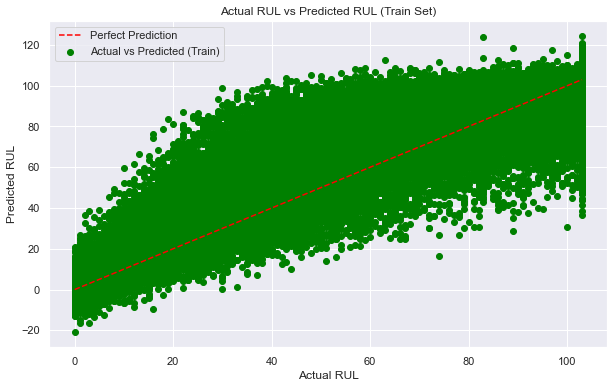

In [78]:
# Visualize actual RUL vs predicted RUL for train set
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_hat_train_dcnn, color='green', label='Actual vs Predicted (Train)')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual RUL vs Predicted RUL (Train Set)')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.show()


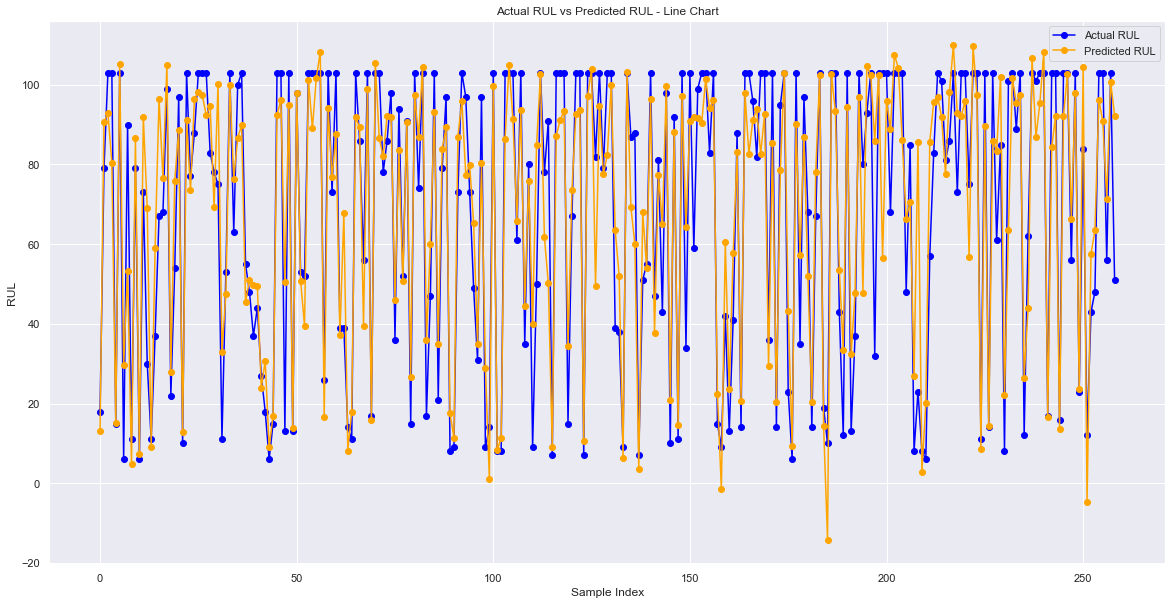

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_hat_test_bi_tcn are your actual and predicted RUL values
plt.figure(figsize=(20, 10))

# Line chart for actual RUL
plt.plot(y_test, label='Actual RUL', marker='o', linestyle='-', color='blue')

# Line chart for predicted RUL
plt.plot(y_hat_test_dcnn, label='Predicted RUL', marker='o', linestyle='-', color='orange')

plt.title('Actual RUL vs Predicted RUL - Line Chart')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


## Individual model result

In [80]:
# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  RMSE-Test   R2-Test
0   BiLSTM   16.082523  0.768311  16.066886  0.804917
1   BiTRNN   16.492995  0.756333  15.512946  0.818136
2    BiGRU   15.800731  0.776359  15.725679  0.813114
3  ProgNet   15.469127  0.785647  14.412868  0.843015
4     DCNN   15.305483  0.790158  15.014675  0.829632

## Ensemble model using RDT(Regression Decision Tree)

In [81]:
# Concatenate predictions from all the base learners  for training data
X_train_ensemble = np.concatenate((y_hat_train_bi_trnn, y_hat_train_bi_gru, y_hat_train_dcnn, y_hat_train_prognet, y_hat_train_lstm), axis=1)

# Concatenate predictions from all the base learners for test data
X_test_ensemble = np.concatenate((y_hat_test_bi_trnn,y_hat_test_bi_gru,y_hat_test_dcnn, y_hat_test_prognet, y_hat_test_lstm), axis=1)


In [82]:
# Model : Regression Decision Tree (RDT)
rdt_model = DecisionTreeRegressor()

# Train the RDT model
rdt_model.fit(X_train_ensemble, y_train)


DecisionTreeRegressor()

In [83]:
# Predictions on training data
y_hat_train_ensemble = rdt_model.predict(X_train_ensemble)
RMSE_Train_Ensemble, R2_Train_Ensemble = evaluate(y_train, y_hat_train_ensemble, 'train')

# Predictions on test data
y_hat_test_ensemble = rdt_model.predict(X_test_ensemble)
RMSE_Test_Ensemble, R2_Test_Ensemble = evaluate(y_test, y_hat_test_ensemble, 'test')


train set RMSE:0.0, R2:1.0
test set RMSE:20.381307205321335, R2:0.6860784948977391


In [84]:
# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)'],
    'RMSE-Train': [RMSE_Train_Ensemble],
    'R2-Train': [R2_Train_Ensemble],
    'RMSE-Test': [RMSE_Test_Ensemble],
    'R2-Test': [R2_Test_Ensemble]
}), ignore_index=True)

# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  \
0                                             BiLSTM   16.082523  0.768311   
1                                             BiTRNN   16.492995  0.756333   
2                                              BiGRU   15.800731  0.776359   
3                                            ProgNet   15.469127  0.785647   
4                                               DCNN   15.305483  0.790158   
5  Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)    0.000000  1.000000   

   RMSE-Test   R2-Test  
0  16.066886  0.804917  
1  15.512946  0.818136  
2  15.725679  0.813114  
3  14.412868  0.843015  
4  15.014675  0.829632  
5  20.381307  0.686078

## Ensemble model using Random Forest Regressor

In [85]:
# Model : Random Forest 
random_forest_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)


In [86]:
# Train the Random Forest model
random_forest_model.fit(X_train_ensemble, y_train)


RandomForestRegressor(max_depth=10, random_state=42)

In [87]:
# Predictions on training data
y_hat_train_rf = random_forest_model.predict(X_train_ensemble)
RMSE_Train_RF, R2_Train_RF = evaluate(y_train, y_hat_train_rf, 'train')

# Predictions on test data
y_hat_test_rf = random_forest_model.predict(X_test_ensemble)
RMSE_Test_RF, R2_Test_RF = evaluate(y_test, y_hat_test_rf, 'test')


train set RMSE:13.762840372701211, R2:0.830326512744669
test set RMSE:14.116456010262409, R2:0.8494057617724108


In [88]:

# Add results to the DataFrame
Results = Results.append(pd.DataFrame({
    'Model': ['Random Forest (Ensemble)'],
    'RMSE-Train': [RMSE_Train_RF],
    'R2-Train': [R2_Train_RF],
    'RMSE-Test': [RMSE_Test_RF],
    'R2-Test': [R2_Test_RF]
}), ignore_index=True)

# Display the results DataFrame
Results


Model  RMSE-Train  R2-Train  \
0                                             BiLSTM   16.082523  0.768311   
1                                             BiTRNN   16.492995  0.756333   
2                                              BiGRU   15.800731  0.776359   
3                                            ProgNet   15.469127  0.785647   
4                                               DCNN   15.305483  0.790158   
5  Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)    0.000000  1.000000   
6                           Random Forest (Ensemble)   13.762840  0.830327   

   RMSE-Test   R2-Test  
0  16.066886  0.804917  
1  15.512946  0.818136  
2  15.725679  0.813114  
3  14.412868  0.843015  
4  15.014675  0.829632  
5  20.381307  0.686078  
6  14.116456  0.849406

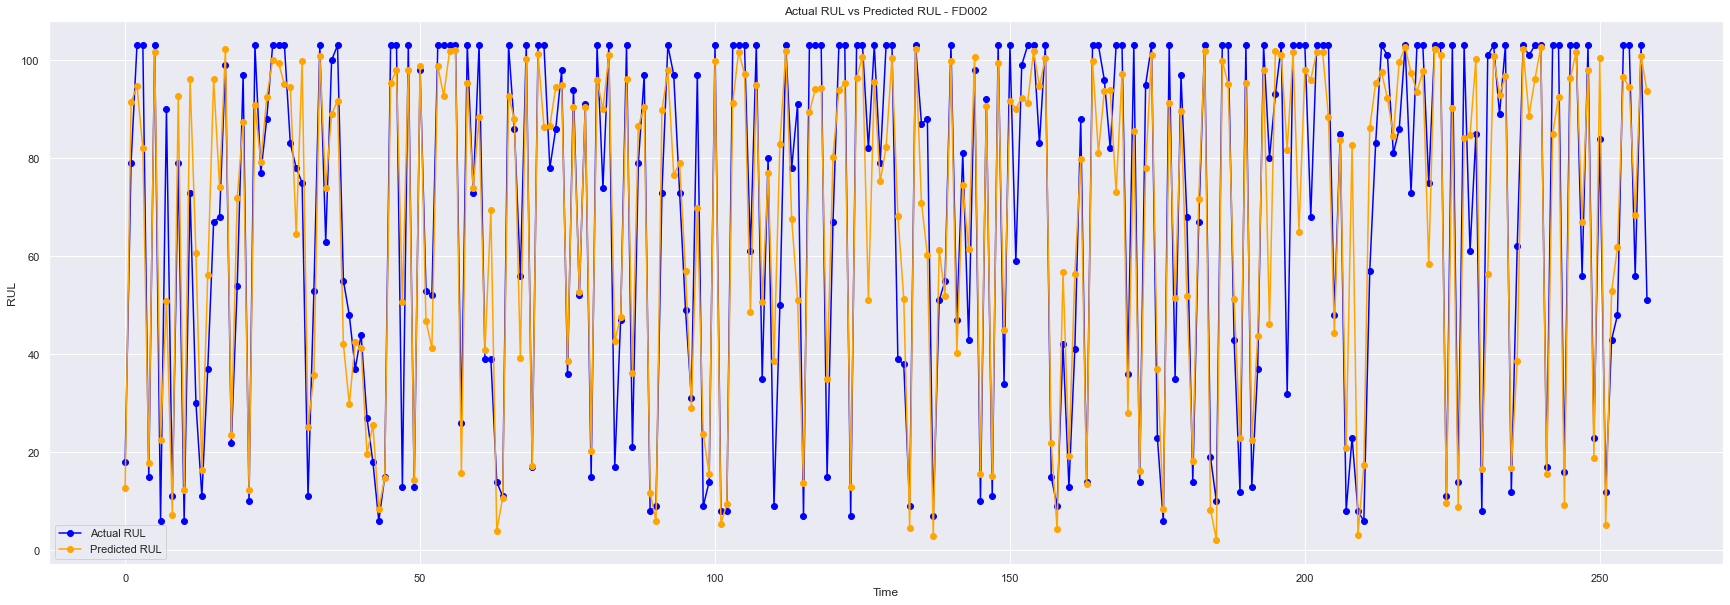

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_hat_test_bi_tcn are your actual and predicted RUL values
plt.figure(figsize=(30, 10))

# Line chart for actual RUL
plt.plot(y_test, label='Actual RUL', marker='o', linestyle='-', color='blue')

# Line chart for predicted RUL
plt.plot(y_hat_test_rf, label='Predicted RUL', marker='o', linestyle='-', color='orange')

plt.title('Actual RUL vs Predicted RUL - FD002')
plt.xlabel('Time')
plt.ylabel('RUL')
plt.legend()
plt.grid(True)
plt.show()


## Conclusion

In [90]:
Results

Model  RMSE-Train  R2-Train  \
0                                             BiLSTM   16.082523  0.768311   
1                                             BiTRNN   16.492995  0.756333   
2                                              BiGRU   15.800731  0.776359   
3                                            ProgNet   15.469127  0.785647   
4                                               DCNN   15.305483  0.790158   
5  Ensemble (Bi-trnn+ Bi-GRU+ DCNN+ProgNet +Bi-LSTM)    0.000000  1.000000   
6                           Random Forest (Ensemble)   13.762840  0.830327   

   RMSE-Test   R2-Test  
0  16.066886  0.804917  
1  15.512946  0.818136  
2  15.725679  0.813114  
3  14.412868  0.843015  
4  15.014675  0.829632  
5  20.381307  0.686078  
6  14.116456  0.849406

## Base Paper Result

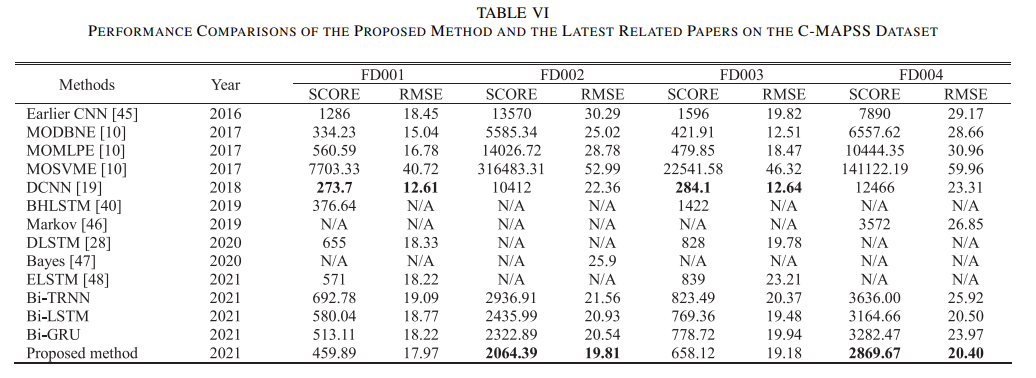